# **New York City Yellow Taxi Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [ ]:
# Import warnings
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2
!pip install numpy==1.26.4
!pip install pandas==2.2.2
!pip install matplotlib==3.10.0
!pip install seaborn==0.13.2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 77.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [129]:
# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [ ]:
# Try loading one file
df = pd.read_parquet('/content/drive/MyDrive/Datasets and Dictionary/trip_records/2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

In [ ]:
df.shape

(3041714, 19)

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?
**Answer:** *There 3066765 rows in this file, it is better not to take all the data because it will take up a lot of space and time for analysis. We should take a small sample from the population for analysis*


To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('/content/drive/MyDrive/Datasets and Dictionary/trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
sampled_df = pd.DataFrame()

# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        #file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        df = pd.read_parquet(file_path)

        df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

        df['date'] = df['tpep_pickup_datetime'].dt.date
        df['hour'] = df['tpep_pickup_datetime'].dt.hour

        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for date in df['date'].unique():
            date_data = df[df['date'] == date]

            # Iterate through each hour of the selected date
            for hour in range(24):
                hour_data = date_data[date_data['hour'] == hour]

                # Sample 1% of the hourly data randomly
                if not hour_data.empty:
                    sample = hour_data.sample(frac=0.0075, random_state=42)

                # add data of this hour to the dataframe
                    sampled_data = pd.concat([sampled_data, sample])

        # Concatenate the sampled data of all the dates to a single dataframe
        sampled_df = pd.concat([sampled_df, sampled_data])

    except Exception as e:
        print(f"An error occurred while processing file {file_name}: {e}")

In [ ]:
# Store the df in csv/parquet
# df.to_csv('')
# Define the file path
file_path = '/content/drive/MyDrive/Datasets and Dictionary/data_NYC_0.0075.csv'

# Save the sampled_df to the specified path
sampled_df.to_csv(file_path, index=False)

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [158]:
# Load the new data file
df = pd.read_csv('/content/drive/MyDrive/Datasets and Dictionary/data_NYC_0.0075.csv')

In [159]:
len(df)

284492

In [160]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,date,hour,Airport_fee
0,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1.0,7.74,1.0,N,138,256,2,...,0.5,0.00,0.0,1.0,41.15,0.0,1.25,2023-01-01,0,NaN
1,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2.0,1.24,1.0,N,161,237,1,...,0.5,2.58,0.0,1.0,15.48,2.5,0.00,2023-01-01,0,NaN
2,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3.0,1.44,1.0,N,237,141,2,...,0.5,0.00,0.0,1.0,16.40,2.5,0.00,2023-01-01,0,NaN
3,2,2023-01-01 00:24:30,2023-01-01 00:29:55,1.0,0.54,1.0,N,143,142,2,...,0.5,0.00,0.0,1.0,11.50,2.5,0.00,2023-01-01,0,NaN
4,2,2023-01-01 00:43:00,2023-01-01 01:01:00,NaN,19.24,NaN,NaN,66,107,0,...,0.5,5.93,0.0,1.0,35.57,NaN,NaN,2023-01-01,0,NaN


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284492 entries, 0 to 284491
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               284492 non-null  int64  
 1   tpep_pickup_datetime   284492 non-null  object 
 2   tpep_dropoff_datetime  284492 non-null  object 
 3   passenger_count        275065 non-null  float64
 4   trip_distance          284492 non-null  float64
 5   RatecodeID             275065 non-null  float64
 6   store_and_fwd_flag     275065 non-null  object 
 7   PULocationID           284492 non-null  int64  
 8   DOLocationID           284492 non-null  int64  
 9   payment_type           284492 non-null  int64  
 10  fare_amount            284492 non-null  float64
 11  extra                  284492 non-null  float64
 12  mta_tax                284492 non-null  float64
 13  tip_amount             284492 non-null  float64
 14  tolls_amount           284492 non-nu

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

After analysing it is understood the following columns to be dropped


1.   tpep_pickup_datetime, tpep_dropoff_datetime: Extracting day of week, hours of day, and month from these files for easier analysis  
2.   store_and_fwd_flag : This column indicates if the trip data was stored before forwarding.This data seems not revelant for the analysis



In [162]:
# Fix the index and drop any columns that are not needed
# Convert to datetime objects if necessary
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

#Extract date,time,hours
df['pickup_dayofweek'] = df['tpep_pickup_datetime'].dt.dayofweek  # 0: Monday, 6: Sunday
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60  # Duration in minutes

# Drop the original columns
columns_to_drop = ['tpep_pickup_datetime','tpep_dropoff_datetime','date', 'hour']
df = df.drop(columns=columns_to_drop, errors='ignore')

In [163]:
#dropping store_and_fwd_flag column as the data seems irelevant
df = df.drop('store_and_fwd_flag', axis=1)

In [164]:
df.head()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,...,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Airport_fee,pickup_dayofweek,pickup_hour,pickup_month,trip_duration
0,2,1.0,7.74,1.0,138,256,2,32.40,6.0,0.5,...,0.0,1.0,41.15,0.0,1.25,NaN,6,0,1,15.950000
1,2,2.0,1.24,1.0,161,237,1,7.90,1.0,0.5,...,0.0,1.0,15.48,2.5,0.00,NaN,6,0,1,5.083333
2,2,3.0,1.44,1.0,237,141,2,11.40,1.0,0.5,...,0.0,1.0,16.40,2.5,0.00,NaN,6,0,1,10.550000
3,2,1.0,0.54,1.0,143,142,2,6.50,1.0,0.5,...,0.0,1.0,11.50,2.5,0.00,NaN,6,0,1,5.416667
4,2,NaN,19.24,NaN,66,107,0,25.64,0.0,0.5,...,0.0,1.0,35.57,NaN,NaN,NaN,6,0,1,18.000000


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284492 entries, 0 to 284491
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               284492 non-null  int64  
 1   passenger_count        275065 non-null  float64
 2   trip_distance          284492 non-null  float64
 3   RatecodeID             275065 non-null  float64
 4   PULocationID           284492 non-null  int64  
 5   DOLocationID           284492 non-null  int64  
 6   payment_type           284492 non-null  int64  
 7   fare_amount            284492 non-null  float64
 8   extra                  284492 non-null  float64
 9   mta_tax                284492 non-null  float64
 10  tip_amount             284492 non-null  float64
 11  tolls_amount           284492 non-null  float64
 12  improvement_surcharge  284492 non-null  float64
 13  total_amount           284492 non-null  float64
 14  congestion_surcharge   275065 non-nu

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [166]:
# Combine the two airport fee columns
# fill all na with 0
df['Airport_fee'] = df['Airport_fee'].fillna(0)
df['airport_fee'] = df['airport_fee'].fillna(0)

# Creating a new column with the combined value of both airports_fees
df['Airport_fee_sum'] = df['Airport_fee'] + df['airport_fee']
df.head()

#drop unwanted columns
df = df.drop(['Airport_fee', 'airport_fee'], axis=1)

df.head()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_dayofweek,pickup_hour,pickup_month,trip_duration,Airport_fee_sum
0,2,1.0,7.74,1.0,138,256,2,32.40,6.0,0.5,0.00,0.0,1.0,41.15,0.0,6,0,1,15.950000,1.25
1,2,2.0,1.24,1.0,161,237,1,7.90,1.0,0.5,2.58,0.0,1.0,15.48,2.5,6,0,1,5.083333,0.00
2,2,3.0,1.44,1.0,237,141,2,11.40,1.0,0.5,0.00,0.0,1.0,16.40,2.5,6,0,1,10.550000,0.00
3,2,1.0,0.54,1.0,143,142,2,6.50,1.0,0.5,0.00,0.0,1.0,11.50,2.5,6,0,1,5.416667,0.00
4,2,NaN,19.24,NaN,66,107,0,25.64,0.0,0.5,5.93,0.0,1.0,35.57,NaN,6,0,1,18.000000,0.00


In [167]:
df.info() #check

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284492 entries, 0 to 284491
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               284492 non-null  int64  
 1   passenger_count        275065 non-null  float64
 2   trip_distance          284492 non-null  float64
 3   RatecodeID             275065 non-null  float64
 4   PULocationID           284492 non-null  int64  
 5   DOLocationID           284492 non-null  int64  
 6   payment_type           284492 non-null  int64  
 7   fare_amount            284492 non-null  float64
 8   extra                  284492 non-null  float64
 9   mta_tax                284492 non-null  float64
 10  tip_amount             284492 non-null  float64
 11  tolls_amount           284492 non-null  float64
 12  improvement_surcharge  284492 non-null  float64
 13  total_amount           284492 non-null  float64
 14  congestion_surcharge   275065 non-nu

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [168]:
# check where values of fare amount are negative
df[df['fare_amount'] < 0]
# seems there are no negative value for fare_amount field
df.fare_amount.describe()

,fare_amount
count,284492.000000
mean,19.817924
std,18.203902
min,0.000000
25%,9.300000
50%,13.500000
75%,21.900000
max,910.000000


Did you notice something different in the `RatecodeID` column for above records?

In [169]:
# Analyse RatecodeID for the negative fare amounts
df[df['fare_amount'] < 0]['RatecodeID'].value_counts()


,count
RatecodeID,


In [170]:
# Find which columns have negative values
# Get a list of numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Create a dictionary to store negative value counts
negative_counts = {}

# Count negative values for each numerical column
for col in numerical_cols:
    negative_counts[col] = (df[col] < 0).sum()

# Create a DataFrame from the dictionary
negative_df = pd.DataFrame(negative_counts, index=['Negative Count']).T  # T to transpose for better readability

print(negative_df)

                       Negative Count
VendorID                            0
passenger_count                     0
trip_distance                       0
RatecodeID                          0
PULocationID                        0
DOLocationID                        0
payment_type                        0
fare_amount                         0
extra                               1
mta_tax                            11
tip_amount                          0
tolls_amount                        0
improvement_surcharge              11
total_amount                       11
congestion_surcharge                6
pickup_dayofweek                    0
pickup_hour                         0
pickup_month                        0
trip_duration                      20
Airport_fee_sum                     2


Since the number of negative values is relatively small compared to the total dataset size of 284492 entries, and because negative values are illogical or invalid in certain columns, we have chosen to drop them.

In [171]:
# fix these negative values
# droping all negative values
df.drop(df[df['extra'] < 0].index, inplace=True)
df.drop(df[df['mta_tax'] < 0].index, inplace=True)
df.drop(df[df['improvement_surcharge'] < 0].index, inplace=True)
df.drop(df[df['total_amount'] < 0].index, inplace=True)
df.drop(df[df['congestion_surcharge'] < 0].index, inplace=True)
df.drop(df[df['trip_duration'] < 0].index, inplace=True)
df.drop(df[df['Airport_fee_sum'] < 0].index, inplace=True)

In [172]:
#Check
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Create a dictionary to store negative value counts
negative_counts = {}

# Count negative values for each numerical column
for col in numerical_cols:
    negative_counts[col] = (df[col] < 0).sum()

# Create a DataFrame from the dictionary
negative_df = pd.DataFrame(negative_counts, index=['Negative Count']).T  # T to transpose for better readability

print(negative_df)

                       Negative Count
VendorID                            0
passenger_count                     0
trip_distance                       0
RatecodeID                          0
PULocationID                        0
DOLocationID                        0
payment_type                        0
fare_amount                         0
extra                               0
mta_tax                             0
tip_amount                          0
tolls_amount                        0
improvement_surcharge               0
total_amount                        0
congestion_surcharge                0
pickup_dayofweek                    0
pickup_hour                         0
pickup_month                        0
trip_duration                       0
Airport_fee_sum                     0


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [173]:
# Find the proportion of missing values in each column
col1=list(df.isnull().mean().index)
col2=list(100*df.isnull().mean().values)
missing_df=pd.DataFrame([col1,col2]).T
missing_df.columns=["feature","missing%"]
missing_df=missing_df.sort_values("missing%",ascending=False).reset_index(drop=True)
missing_df

,feature,missing%
0,RatecodeID,3.310483
1,congestion_surcharge,3.310483
2,passenger_count,3.310483
3,VendorID,0.0
4,tolls_amount,0.0
5,trip_duration,0.0
6,pickup_month,0.0
7,pickup_hour,0.0
8,pickup_dayofweek,0.0
9,total_amount,0.0


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [174]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
df.passenger_count.isnull().sum()/len(df)*100

3.310483020459819

In [175]:
df[df.passenger_count.isnull()]

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_dayofweek,pickup_hour,pickup_month,trip_duration,Airport_fee_sum
4,2,NaN,19.24,NaN,66,107,0,25.64,0.0,0.5,5.93,0.00,1.0,35.57,NaN,6,0,1,18.000000,0.0
15,2,NaN,10.77,NaN,151,106,0,45.38,0.0,0.5,11.19,6.55,1.0,67.12,NaN,6,0,1,33.000000,0.0
43,2,NaN,4.97,NaN,50,226,0,27.62,0.0,0.5,6.32,0.00,1.0,37.94,NaN,6,1,1,29.000000,0.0
44,2,NaN,5.73,NaN,186,255,0,27.32,0.0,0.5,6.26,0.00,1.0,37.58,NaN,6,1,1,31.000000,0.0
59,2,NaN,2.98,NaN,137,48,0,27.54,0.0,0.5,3.15,0.00,1.0,34.69,NaN,6,1,1,27.816667,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284443,2,NaN,2.07,NaN,229,107,0,14.52,0.0,0.5,0.00,0.00,1.0,18.52,NaN,6,22,12,14.833333,0.0
284457,1,NaN,0.00,NaN,239,107,0,23.41,0.0,0.5,0.00,0.00,1.0,27.41,NaN,6,22,12,18.400000,0.0
284462,1,NaN,5.00,NaN,263,249,0,25.04,0.0,0.5,0.00,0.00,1.0,29.04,NaN,6,22,12,20.100000,0.0
284464,2,NaN,1.68,NaN,90,79,0,11.74,0.0,0.5,2.00,0.00,1.0,17.74,NaN,6,23,12,10.000000,0.0


In [176]:
df.groupby('VendorID')['passenger_count'].value_counts()

VendorID  passenger_count
1         1.0                 53169
          2.0                 10963
          0.0                  4359
          3.0                  2571
          4.0                  1303
          5.0                    53
          6.0                    34
2         1.0                154070
          2.0                 30427
          3.0                  7814
          4.0                  4406
          5.0                  3494
          6.0                  2359
          0.0                    16
          7.0                     2
          8.0                     2
          9.0                     1
Name: count, dtype: int64

After analysing, Since the number of NaN values are very less so it is better to drop the entries

In [177]:
df.dropna(subset=['passenger_count'], inplace=True)

In [178]:
df.passenger_count.isnull().sum()/len(df)*100 # check

0.0

Did you find zeroes in passenger_count? Handle these.

In [179]:
df.passenger_count.value_counts()

,count
passenger_count,
1.0,207239
2.0,41390
3.0,10385
4.0,5709
0.0,4375
5.0,3547
6.0,2393
7.0,2
8.0,2


In [180]:
df.passenger_count.describe()

,passenger_count
count,275043.000000
mean,1.367575
std,0.890969
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,9.000000


It seems there are 5824 rows with passenger count = 0, so replacing this with the median vallue of passenger_count

In [181]:
df.passenger_count.replace(0, df.passenger_count.median(), inplace=True)

In [182]:
df.passenger_count.value_counts() #check

,count
passenger_count,
1.0,211614
2.0,41390
3.0,10385
4.0,5709
5.0,3547
6.0,2393
7.0,2
8.0,2
9.0,1


**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [183]:
# Fix missing values in 'RatecodeID'
df.RatecodeID.isnull().sum()/len(df)*100


0.0

In [184]:
# But we have entries with 99 which indicates null/unknown values
df.RatecodeID.value_counts()

,count
RatecodeID,
1.0,259625
2.0,10794
99.0,1632
5.0,1541
3.0,902
4.0,549


In [185]:
#Seeing the less number of entries we decide to remove the entries with 99
df.drop(df[df.RatecodeID == 99].index, inplace=True)

In [186]:
df.RatecodeID.value_counts() # Check

,count
RatecodeID,
1.0,259625
2.0,10794
5.0,1541
3.0,902
4.0,549


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [187]:
# handle null values in congestion_surcharge

df.congestion_surcharge.isnull().sum()/len(df)*100


0.0

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.
**Answer:** Yes we have nan values in airport_fee_sum but this was taken care while combining the data

In [188]:
# Handle any remaining missing values
col1=list(df.isnull().mean().index)
col2=list(100*df.isnull().mean().values)
missing_df=pd.DataFrame([col1,col2]).T
missing_df.columns=["feature","missing%"]
missing_df=missing_df.sort_values("missing%",ascending=False).reset_index(drop=True)
missing_df


,feature,missing%
0,VendorID,0.0
1,passenger_count,0.0
2,trip_duration,0.0
3,pickup_month,0.0
4,pickup_hour,0.0
5,pickup_dayofweek,0.0
6,congestion_surcharge,0.0
7,total_amount,0.0
8,improvement_surcharge,0.0
9,tolls_amount,0.0


In [189]:
df.Airport_fee_sum.value_counts()
#ignoring it, as 0 is a possible value for this field

,count
Airport_fee_sum,
0.00,249285
1.75,18043
1.25,6083




```
# This is formatted as code
```

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [190]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
df.describe()


,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_dayofweek,pickup_hour,pickup_month,trip_duration,Airport_fee_sum
count,273411.000000,273411.000000,273411.000000,273411.000000,273411.000000,273411.000000,273411.000000,273411.000000,273411.000000,273411.000000,273411.000000,273411.000000,273411.000000,273411.000000,273411.000000,273411.000000,273411.000000,273411.000000,273411.000000,273411.000000
mean,1.740972,1.385745,3.420019,1.074646,165.632838,164.433754,1.206202,19.648963,1.645677,0.495404,3.594098,0.586207,0.999367,28.802873,2.322291,2.999711,14.317785,6.506220,17.139054,0.143297
std,0.438102,0.877259,4.516573,0.394151,63.620663,69.642379,0.466816,18.308575,1.831471,0.047796,4.071438,2.160629,0.023200,22.940876,0.642412,1.928717,5.777972,3.461862,40.649397,0.465114
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.050000,1.000000,132.000000,114.000000,1.000000,9.300000,0.000000,0.500000,1.000000,0.000000,1.000000,15.960000,2.500000,1.000000,11.000000,4.000000,7.583333,0.000000
50%,2.000000,1.000000,1.780000,1.000000,162.000000,162.000000,1.000000,13.500000,1.000000,0.500000,2.860000,0.000000,1.000000,21.000000,2.500000,3.000000,15.000000,6.000000,12.483333,0.000000
75%,2.000000,1.000000,3.330000,1.000000,234.000000,234.000000,1.000000,21.900000,2.500000,0.500000,4.480000,0.000000,1.000000,30.600000,2.500000,5.000000,19.000000,10.000000,20.316667,0.000000
max,2.000000,9.000000,187.350000,5.000000,265.000000,265.000000,4.000000,910.000000,14.250000,0.800000,150.290000,143.000000,1.000000,911.000000,2.500000,6.000000,23.000000,12.000000,5411.000000,1.750000


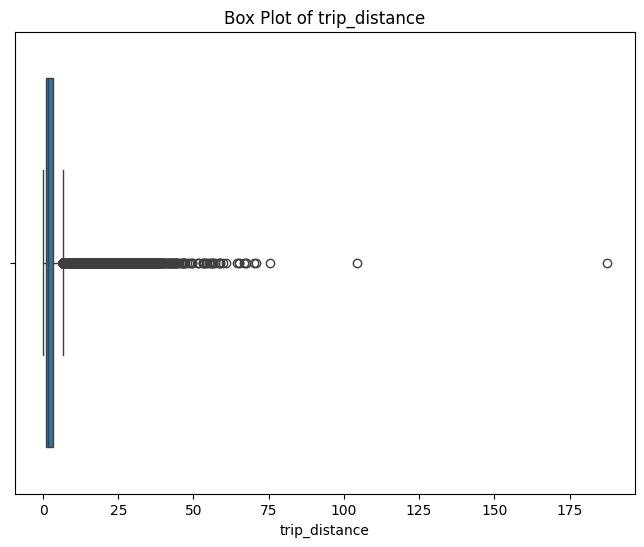

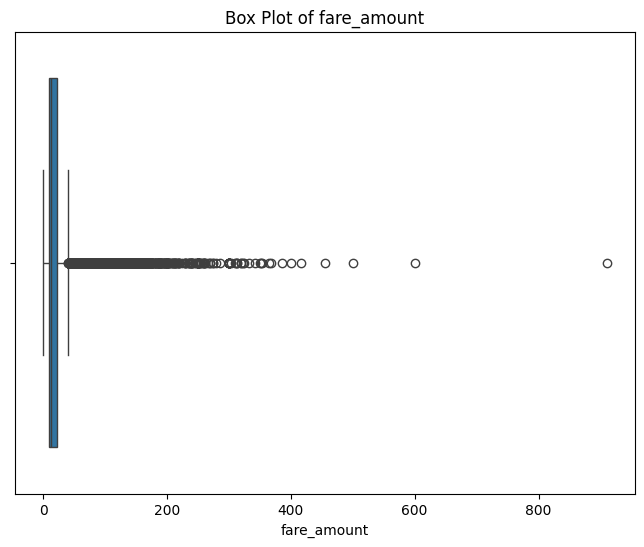

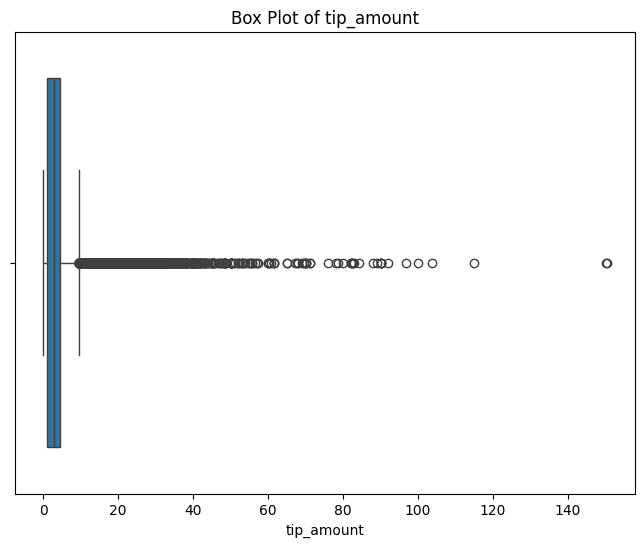

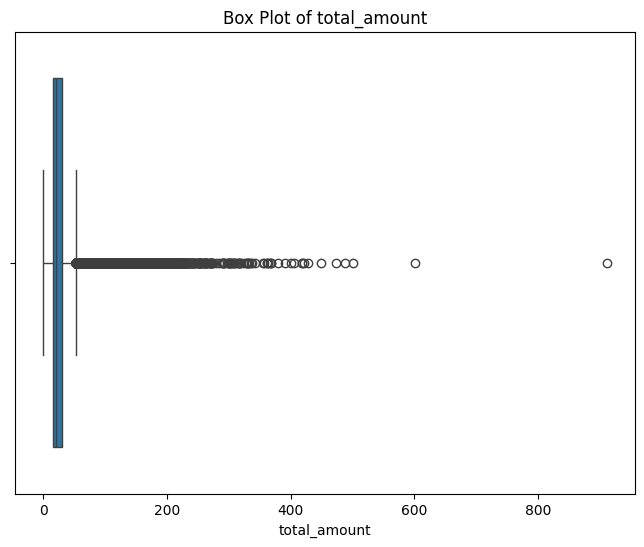

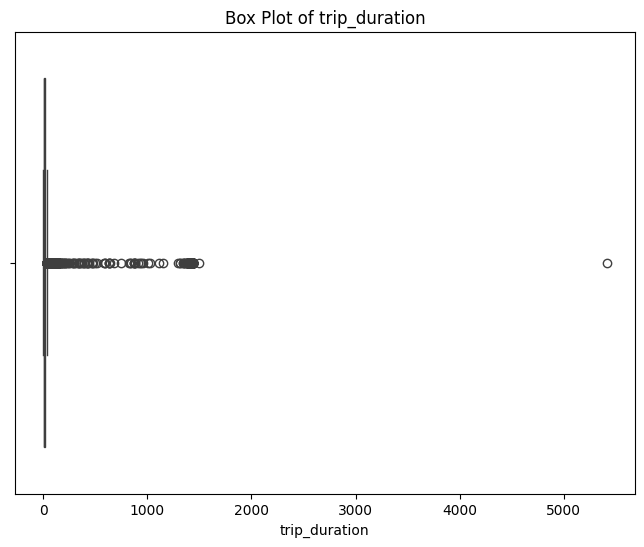

In [191]:
# Select numerical columns for outlier analysis
numerical_cols = ['trip_distance', 'fare_amount', 'tip_amount', 'total_amount', 'trip_duration']

# Create box plots for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(8, 6))  # Adjust figure size if needed
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

In [192]:
df.fare_amount.value_counts()

,count
fare_amount,
8.60,12514
9.30,12467
10.00,12427
7.90,12153
10.70,11643
...,...
82.55,1
29.95,1
5.15,1


**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [193]:
# remove passenger_count > 6
df.drop(df[df.passenger_count > 6].index, inplace=True)
df.passenger_count.value_counts()

,count
passenger_count,
1.0,209985
2.0,41388
3.0,10385
4.0,5709
5.0,3547
6.0,2392


#### Outlier Handling

In [194]:
# Continue with outlier handling
filtered_df1 = df[(df['trip_distance'] < 0.1) & (df['fare_amount'] > 300)]
filtered_df1

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_dayofweek,pickup_hour,pickup_month,trip_duration,Airport_fee_sum
64998,2,1.0,0.0,5.0,265,265,2,500.0,0.0,0.0,0.0,0.0,1.0,501.0,0.0,2,12,6,0.350000,0.0
71856,2,1.0,0.0,5.0,265,265,1,350.0,0.0,0.0,70.2,0.0,1.0,421.2,0.0,3,20,6,0.133333,0.0
99838,1,1.0,0.0,5.0,246,246,4,910.0,0.0,0.0,0.0,0.0,1.0,911.0,0.0,3,7,2,1.716667,0.0
119894,2,1.0,0.0,5.0,265,265,2,600.0,0.0,0.0,0.0,0.0,1.0,601.0,0.0,2,21,4,9.233333,0.0
265715,2,1.0,0.0,5.0,265,265,2,319.0,0.0,0.0,0.0,0.0,1.0,320.0,0.0,3,23,12,0.266667,0.0
281467,2,1.0,0.0,5.0,14,14,1,417.0,0.0,0.0,0.0,0.0,1.0,418.0,0.0,6,14,12,0.616667,0.0


In [195]:
# droping the value as the entries are very less(7)
df.drop(filtered_df1.index, inplace=True)

In [196]:
filtered_df2 = df[(df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID'])]
filtered_df2

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_dayofweek,pickup_hour,pickup_month,trip_duration,Airport_fee_sum
94093,2,1.0,0.0,1.0,193,7,1,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,2,16,2,0.650000,0.00
137682,2,1.0,0.0,1.0,264,255,2,0.0,0.00,0.5,0.0,0.0,1.0,5.75,2.5,4,13,4,50.550000,1.75
141815,1,1.0,0.0,5.0,75,264,2,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,1,17,5,0.000000,0.00
275431,1,1.0,0.0,5.0,138,264,3,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0,9,12,0.000000,0.00
277288,1,1.0,0.0,5.0,138,264,2,0.0,9.25,0.0,0.0,0.0,1.0,10.25,2.5,2,13,12,0.000000,1.75
281130,1,3.0,0.0,5.0,132,215,4,0.0,1.75,0.0,0.0,0.0,1.0,2.75,0.0,2,20,12,8.316667,1.75


In [197]:
# droping the value as the entries are very less(7)
df.drop(filtered_df2.index, inplace=True)

In [198]:
# Do any columns need standardising?


In [199]:
filtered_df3 = df[df['trip_distance'] > 100]
filtered_df3

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_dayofweek,pickup_hour,pickup_month,trip_duration,Airport_fee_sum
89357,2,1.0,104.30,1.0,43,170,1,23.3,0.0,0.5,2.73,0.00,1.0,30.03,2.5,4,14,8,24.383333,0.0
275441,2,1.0,187.35,5.0,246,265,1,180.0,0.0,0.0,0.15,12.75,1.0,193.90,0.0,0,10,12,167.900000,0.0


In [200]:
# droping the value as the entries are very less(2)
df.drop(filtered_df3.index, inplace=True)

In [201]:
filtered_df4 = df[df['payment_type'] == 0]
filtered_df4

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_dayofweek,pickup_hour,pickup_month,trip_duration,Airport_fee_sum


In [202]:
filtered_df5 = df[df['fare_amount'] > 1000]
filtered_df5

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_dayofweek,pickup_hour,pickup_month,trip_duration,Airport_fee_sum


In [203]:
# droping the value as the entries are very less(1)
df.drop(filtered_df5.index, inplace=True)

In [204]:
filtered_df6 = df[(df['trip_distance'] > 50) & (df['fare_amount'] < 100)]
filtered_df6

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_dayofweek,pickup_hour,pickup_month,trip_duration,Airport_fee_sum
7155,1,1.0,53.20,5.0,132,265,3,0.0,0.0,0.0,0.0,21.30,1.0,22.30,0.0,2,16,1,81.150000,0.00
126372,1,1.0,56.00,5.0,132,265,3,0.0,0.0,0.0,0.0,25.85,1.0,26.85,0.0,3,10,4,74.033333,0.00
280006,2,1.0,64.49,2.0,132,264,2,70.0,0.0,0.5,0.0,6.94,1.0,82.69,2.5,5,19,12,840.233333,1.75


In [205]:
# droping the value as the entries are very less(5)
df.drop(filtered_df6.index, inplace=True)

In [206]:
filtered_df7 = df[df['fare_amount'] == 0]
filtered_df7

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_dayofweek,pickup_hour,pickup_month,trip_duration,Airport_fee_sum
470,1,1.0,0.0,2.0,261,261,3,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,6,19,1,0.350000,0.00
8125,2,1.0,0.0,1.0,264,264,1,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,3,19,1,0.216667,0.00
9977,1,1.0,0.0,1.0,132,132,3,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,5,23,1,0.216667,0.00
16376,1,1.0,0.0,1.0,132,132,3,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0,15,1,2.516667,0.00
18587,2,1.0,0.0,1.0,193,193,1,0.0,0.00,0.5,0.00,0.00,1.0,1.50,0.0,3,13,1,2.083333,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243869,1,1.0,22.9,5.0,132,265,1,0.0,1.75,0.0,4.85,21.69,1.0,29.29,0.0,5,10,11,67.450000,1.75
251075,1,2.0,0.0,5.0,265,265,3,0.0,0.00,0.0,0.00,0.00,1.0,1.00,0.0,6,12,11,0.633333,0.00
263033,1,1.0,1.5,5.0,236,236,4,0.0,2.50,0.0,0.00,0.00,1.0,3.50,2.5,1,9,12,0.466667,0.00
276750,1,1.0,0.5,5.0,132,132,4,0.0,0.00,0.0,0.00,0.00,1.0,1.00,0.0,1,19,12,0.816667,0.00


In [207]:
# droping the value as fare_amount cannot be 0
df.drop(filtered_df7.index, inplace=True)

In [208]:
df.shape

(273316, 20)

#### Formating

In [209]:
filtered_df8 = df[(df['trip_distance'] > 150)]
filtered_df8

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_dayofweek,pickup_hour,pickup_month,trip_duration,Airport_fee_sum


comparing the 2 trip distance, entry with distance 187.35 doesn't make sense as fare amount is less compared to 163.52 so dropping this

In [210]:
df.drop(filtered_df8.index, inplace=True)

In [211]:
filtered_df9 = df[(df['trip_duration'] > 1500)]
filtered_df9

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_dayofweek,pickup_hour,pickup_month,trip_duration,Airport_fee_sum
273143,2,1.0,0.5,1.0,226,145,2,17.7,2.5,0.5,0.0,0.0,1.0,21.7,0.0,4,18,12,5411.0,0.0


In [212]:
# droping the value as entry is vaery less and the data seems irregular
df.drop(filtered_df9.index, inplace=True)

In [213]:
#improvement surchage analysing
df.improvement_surcharge.value_counts()

,count
improvement_surcharge,
1.0,273137
0.3,123
0.0,55


In [214]:
#Since 0.3 is more towards 0 we will convert all the value to 0
df.improvement_surcharge.replace(0.3, 0, inplace=True)

In [215]:
df.mta_tax.value_counts()

,count
mta_tax,
0.50,270855
0.00,2447
0.80,9
0.05,4


In [216]:
filtered_df10 = df[(df['mta_tax'] == 4)]
filtered_df10

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_dayofweek,pickup_hour,pickup_month,trip_duration,Airport_fee_sum


In [217]:
# droping the value as entry is vaery less and the data seems irregular
df.drop(filtered_df10.index, inplace=True)

In [218]:
# replacing mta_tax == 0.05 to 0 as they don't have much impact to the data
df.mta_tax.replace(0.05, 0, inplace=True)

In [219]:
df.describe() #check

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_dayofweek,pickup_hour,pickup_month,trip_duration,Airport_fee_sum
count,273315.000000,273315.000000,273315.000000,273315.000000,273315.000000,273315.000000,273315.000000,273315.000000,273315.000000,273315.000000,273315.000000,273315.000000,273315.000000,273315.000000,273315.000000,273315.000000,273315.00000,273315.000000,273315.000000,273315.000000
mean,1.741068,1.385709,3.418532,1.074028,165.631301,164.425403,1.205847,19.641936,1.646128,0.495526,3.593974,0.585704,0.999349,28.796365,2.322933,2.999773,14.31819,6.506203,17.117253,0.143272
std,0.438049,0.876889,4.494175,0.391162,63.618787,69.638640,0.466102,18.131345,1.831440,0.047169,4.061292,2.158003,0.025512,22.797427,0.641339,1.928715,5.77808,3.461860,39.291027,0.465073
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,1.010000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.060000,1.000000,132.000000,114.000000,1.000000,9.300000,0.000000,0.500000,1.000000,0.000000,1.000000,15.960000,2.500000,1.000000,11.00000,4.000000,7.583333,0.000000
50%,2.000000,1.000000,1.780000,1.000000,162.000000,162.000000,1.000000,13.500000,1.000000,0.500000,2.860000,0.000000,1.000000,21.000000,2.500000,3.000000,15.00000,6.000000,12.483333,0.000000
75%,2.000000,1.000000,3.330000,1.000000,234.000000,234.000000,1.000000,21.900000,2.500000,0.500000,4.480000,0.000000,1.000000,30.600000,2.500000,5.000000,19.00000,10.000000,20.316667,0.000000
max,2.000000,6.000000,75.500000,5.000000,265.000000,265.000000,4.000000,455.200000,14.250000,0.800000,150.290000,143.000000,1.000000,488.700000,2.500000,6.000000,23.00000,12.000000,1499.816667,1.750000


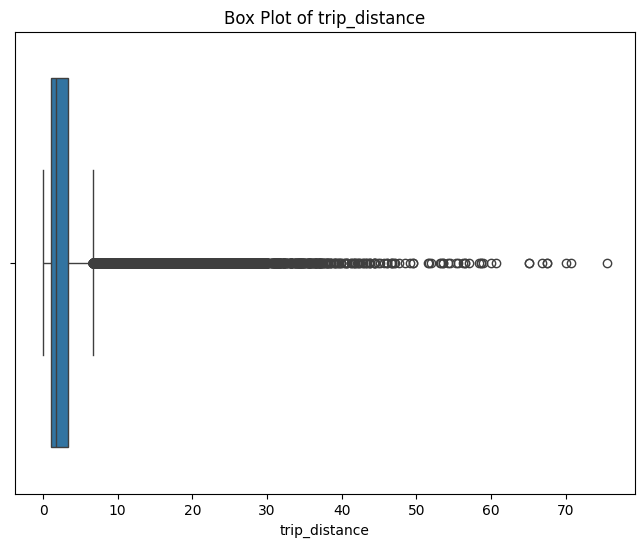

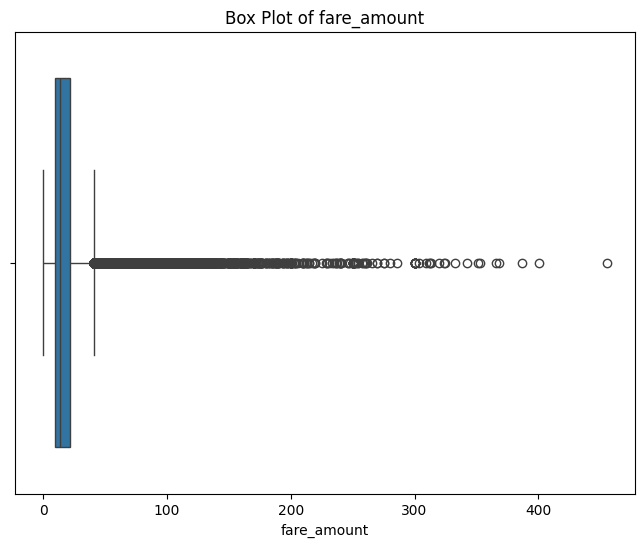

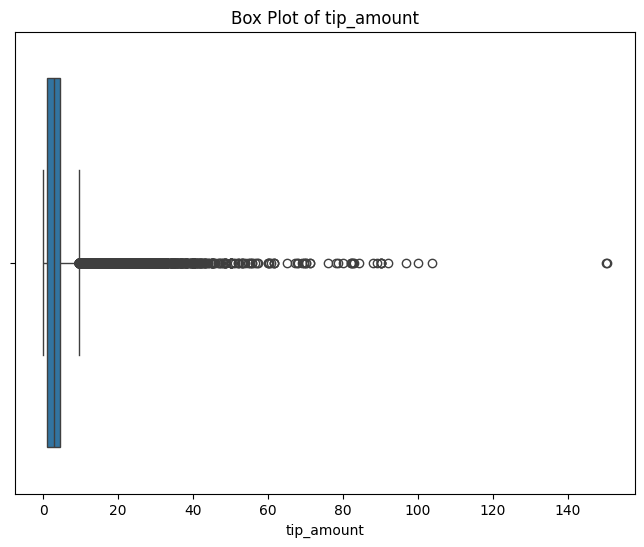

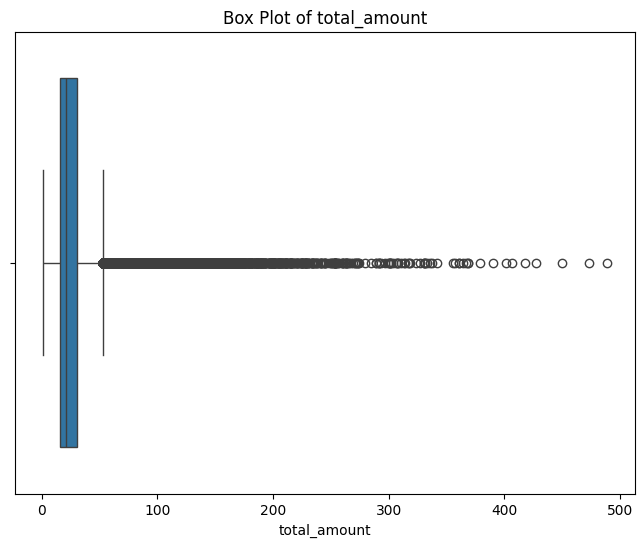

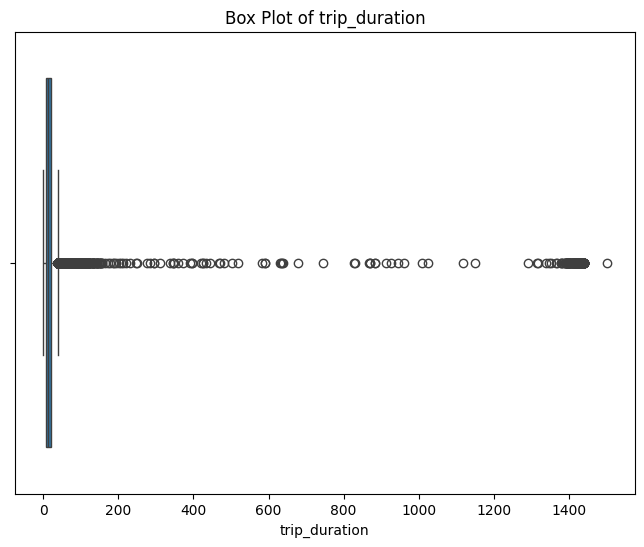

In [220]:
# Check
# Select numerical columns for outlier analysis
numerical_cols = ['trip_distance', 'fare_amount', 'tip_amount', 'total_amount', 'trip_duration']

# Create box plots for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(8, 6))  # Adjust figure size if needed
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

In [221]:
df.shape

(273315, 20)

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [222]:
df.columns.tolist()

['VendorID',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'pickup_dayofweek',
 'pickup_hour',
 'pickup_month',
 'trip_duration',
 'Airport_fee_sum']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`: Categorical
* `tpep_pickup_datetime`:Numerical
* `tpep_dropoff_datetime`:Numerical
* `passenger_count`:Categorical
* `trip_distance`:Numerical
* `RatecodeID`:Categorical
* `PULocationID`:Categorical
* `DOLocationID`:Categorical
* `payment_type`:Categorical
* `pickup_hour`:Numerical
* `trip_duration`:Numerical


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`:Numerical
* `extra`:Numerical
* `mta_tax`:Numerical
* `tip_amount`:Numerical
* `tolls_amount`:Numerical
* `improvement_surcharge`:Categorical
* `total_amount`:Numerical
* `congestion_surcharge`:Categorical
* `airport_fee`:Categorical

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

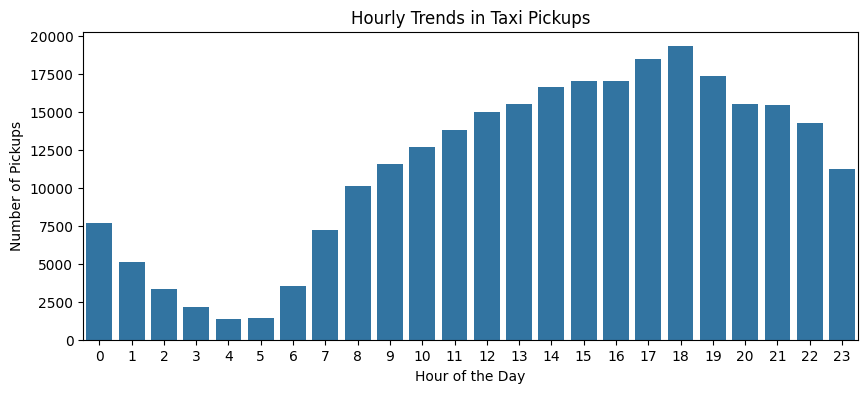

<Figure size 640x480 with 0 Axes>

In [223]:
# Find and show the hourly trends in taxi pickups
hourly_pickups = df.groupby('pickup_hour')['VendorID'].count().reset_index()

# Rename columns for clarity
hourly_pickups.columns = ['Hour', 'Pickups']

# Create a bar plot to visualize hourly trends
plt.figure(figsize=(10, 4))
sns.barplot(x='Hour', y='Pickups', data=hourly_pickups)
plt.title('Hourly Trends in Taxi Pickups')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pickups')
plt.show()
plt.savefig('/content/drive/MyDrive/Datasets and Dictionary/hourly_pickups.png')

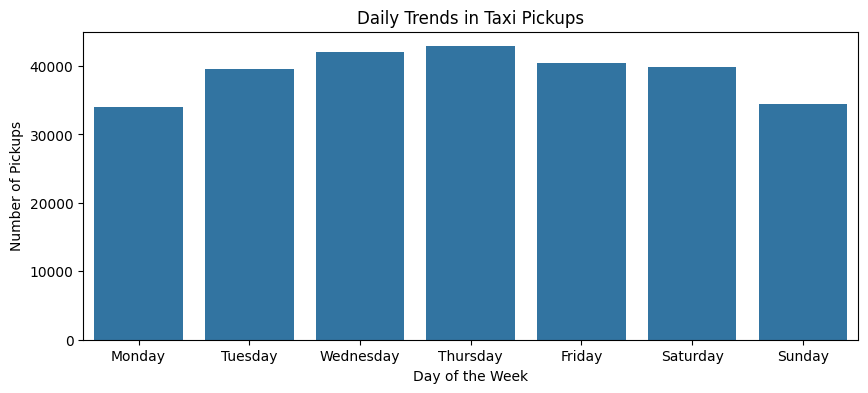

In [224]:
# Find and show the daily trends in taxi pickups (days of the week)

# Group data by pickup day of the week and count the number of trips
daily_pickups = df.groupby('pickup_dayofweek')['VendorID'].count().reset_index()

# Rename columns for clarity
daily_pickups.columns = ['DayOfWeek', 'Pickups']

# Replace day numbers with day names
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_pickups['DayOfWeek'] = daily_pickups['DayOfWeek'].map(lambda x: day_names[x])

# Create a bar plot to visualize daily trends
plt.figure(figsize=(10, 4))
sns.barplot(x='DayOfWeek', y='Pickups', data=daily_pickups)
plt.title('Daily Trends in Taxi Pickups')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Pickups')

plt.savefig('/content/drive/MyDrive/Datasets and Dictionary/daily_pickups.png')

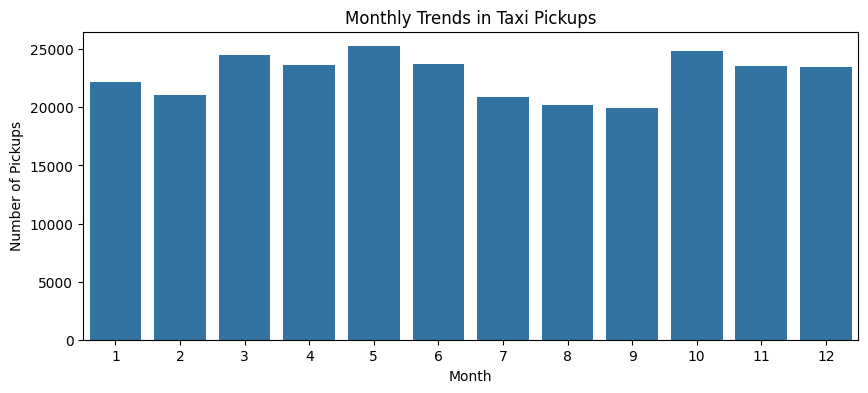

<Figure size 640x480 with 0 Axes>

In [225]:
# Show the monthly trends in pickups
# Group data by pickup month and count the number of trips
monthly_pickups = df.groupby('pickup_month')['VendorID'].count().reset_index()

# Rename columns for clarity
monthly_pickups.columns = ['Month', 'Pickups']

# Create a bar plot to visualize monthly trends
plt.figure(figsize=(10, 4))
sns.barplot(x='Month', y='Pickups', data=monthly_pickups)
plt.title('Monthly Trends in Taxi Pickups')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.show()
plt.savefig('/content/drive/MyDrive/Datasets and Dictionary/monthly_pickups.png')

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [226]:
# Analyse the above parameters
for column in ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']:
    zero_values = df[df[column] == 0]
    negative_values = df[df[column] < 0]

    print(f"Column: {column}")
    print(f"Number of zero values: {len(zero_values)}")
    print(f"Number of negative values: {len(negative_values)}\n")


Column: fare_amount
Number of zero values: 0
Number of negative values: 0

Column: tip_amount
Number of zero values: 59841
Number of negative values: 0

Column: total_amount
Number of zero values: 0
Number of negative values: 0

Column: trip_distance
Number of zero values: 3193
Number of negative values: 0



Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**Answer: fare_amount and total amount cannot be 0 (assumption). Taking this into mind, I removed all 0/negative value during data cleaning process. Kept the 0 value for trip distance and tip_amount**

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

**Answer: we will save this data separately and analyse the reason,than dropping**

In [227]:
df[df['trip_distance'] == 0]['trip_distance'].count()/len(df)*100

1.1682490898779796

In [228]:
# Create a df with non zero entries for the selected parameters.
non_zero_df = df[(df['fare_amount'] != 0) & (df['tip_amount'] != 0) & (df['total_amount'] != 0) & (df['trip_distance'] != 0)]
non_zero_df.head()


,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_dayofweek,pickup_hour,pickup_month,trip_duration,Airport_fee_sum
1,2,2.0,1.24,1.0,161,237,1,7.9,1.0,0.5,2.58,0.0,1.0,15.48,2.5,6,0,1,5.083333,0.00
5,1,2.0,7.10,1.0,246,37,1,34.5,3.5,0.5,7.90,0.0,1.0,47.40,2.5,6,0,1,33.616667,0.00
6,2,2.0,1.59,1.0,79,164,1,11.4,1.0,0.5,3.28,0.0,1.0,19.68,2.5,6,0,1,10.516667,0.00
7,2,1.0,3.16,1.0,79,256,1,19.1,1.0,0.5,6.02,0.0,1.0,30.12,2.5,6,0,1,15.883333,0.00
8,2,1.0,7.64,1.0,132,95,1,31.7,1.0,0.5,7.09,0.0,1.0,42.54,0.0,6,0,1,17.133333,1.25


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

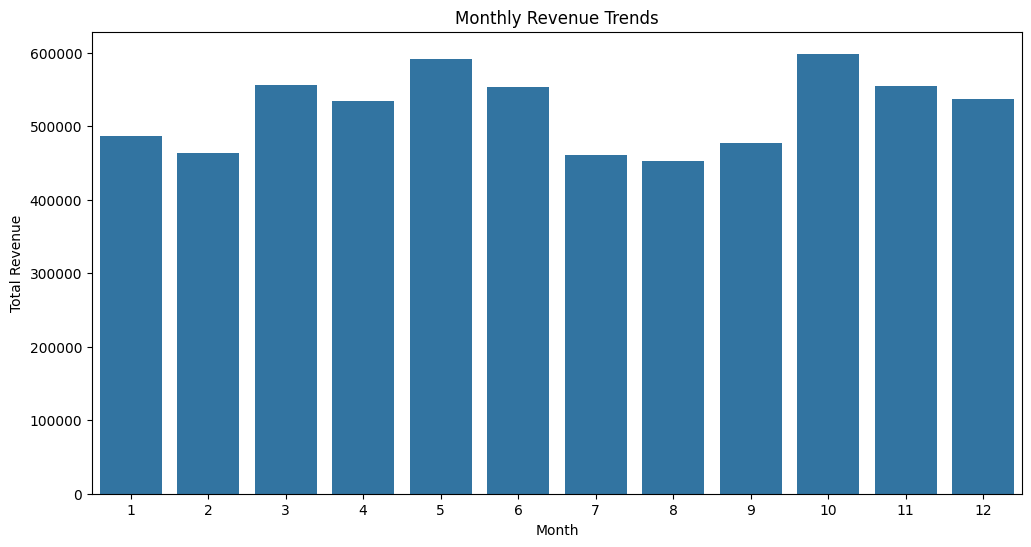

    Month  TotalRevenue
0       1     486594.73
1       2     463374.75
2       3     556151.12
3       4     534263.95
4       5     591377.77
5       6     553617.39
6       7     460902.15
7       8     452512.92
8       9     477033.22
9      10     598645.62
10     11     554286.24
11     12     537108.29

Descriptive Statistics:
count        12.000000
mean     522155.679167
std       51828.761484
min      452512.920000
25%      473618.602500
50%      535686.120000
75%      554752.460000
max      598645.620000
Name: TotalRevenue, dtype: float64


<Figure size 640x480 with 0 Axes>

In [229]:
# Group data by month and analyse monthly revenue
monthly_revenue = non_zero_df.groupby('pickup_month')['total_amount'].sum().reset_index()

# Rename columns for clarity
monthly_revenue.columns = ['Month', 'TotalRevenue']

# Create a bar plot to visualize monthly revenue trends
plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='TotalRevenue', data=monthly_revenue)
plt.title('Monthly Revenue Trends')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()

# Display monthly revenue statistics
print(monthly_revenue)
print("\nDescriptive Statistics:")
print(monthly_revenue['TotalRevenue'].describe())
plt.savefig('/content/drive/MyDrive/Datasets and Dictionary/Monthly_Revenue_Trends.png')

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

  Quarter  Proportion
0      Q1    0.240369
1      Q2    0.268001
2      Q3    0.221908
3      Q4    0.269722


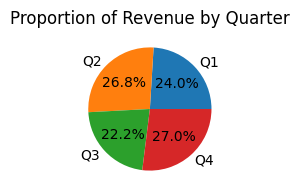

<Figure size 640x480 with 0 Axes>

In [230]:
# Calculate proportion of each quarter
# Define a function to map months to quarters
def get_quarter(month):
    if month in [1, 2, 3]:
        return 'Q1'
    elif month in [4, 5, 6]:
        return 'Q2'
    elif month in [7, 8, 9]:
        return 'Q3'
    else:
        return 'Q4'

# Add a Quarter column to the monthly_revenue DataFrame
monthly_revenue['Quarter'] = monthly_revenue['Month'].apply(get_quarter)
quarterly_revenue = monthly_revenue.groupby('Quarter')['TotalRevenue'].sum().reset_index()

# Calculate the proportion of revenue for each quarter
total_revenue = quarterly_revenue['TotalRevenue'].sum()
quarterly_revenue['Proportion'] = quarterly_revenue['TotalRevenue'] / total_revenue

print(quarterly_revenue[['Quarter', 'Proportion']])

#illustrate it in a pie chart
plt.figure(figsize=(4, 2))
plt.pie(quarterly_revenue['Proportion'], labels=quarterly_revenue['Quarter'], autopct='%1.1f%%')
plt.title('Proportion of Revenue by Quarter')
plt.show()
plt.savefig('/content/drive/MyDrive/Datasets and Dictionary/Revenue_by_Quaters.png')

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

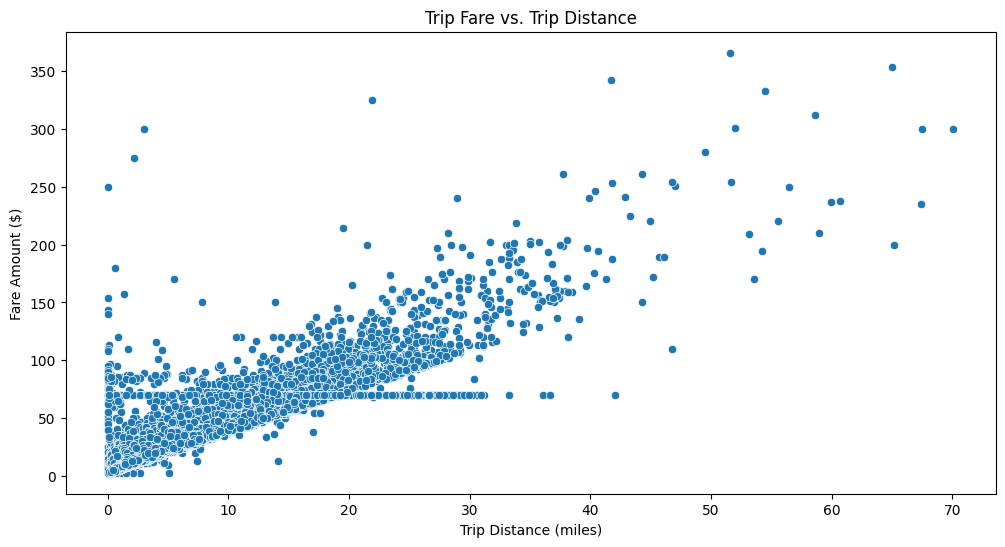

Correlation between Fare Amount and Trip Distance: 0.95


<Figure size 640x480 with 0 Axes>

In [231]:
# Show how trip fare is affected by distance
plt.figure(figsize=(12, 6))
sns.scatterplot(x='trip_distance', y='fare_amount', data=non_zero_df)
plt.title('Trip Fare vs. Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.show()

#calculate correlation between fare and trip
correlation_fare_distance = non_zero_df['fare_amount'].corr(non_zero_df['trip_distance'])
print(f"Correlation between Fare Amount and Trip Distance: {round(correlation_fare_distance,2)}")
plt.savefig('/content/drive/MyDrive/Datasets and Dictionary/fare_vs_distance.png')

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

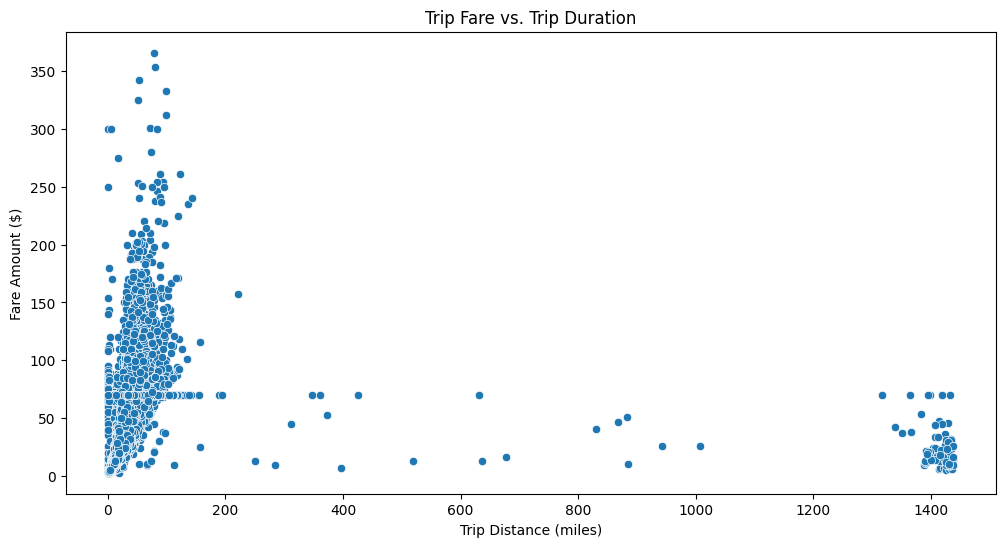

Correlation between Fare Amount and Trip Duration: 0.33


<Figure size 640x480 with 0 Axes>

In [232]:
# Show relationship between fare and trip duration
plt.figure(figsize=(12, 6))
sns.scatterplot(x='trip_duration', y='fare_amount', data=non_zero_df)
plt.title('Trip Fare vs. Trip Duration')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.show()

#calculate correlation between fare and trip
correlation_fare_distance = non_zero_df['fare_amount'].corr(non_zero_df['trip_duration'])
print(f"Correlation between Fare Amount and Trip Duration: {round(correlation_fare_distance,2)}")
plt.savefig('/content/drive/MyDrive/Datasets and Dictionary/fare_vs_duration.png')

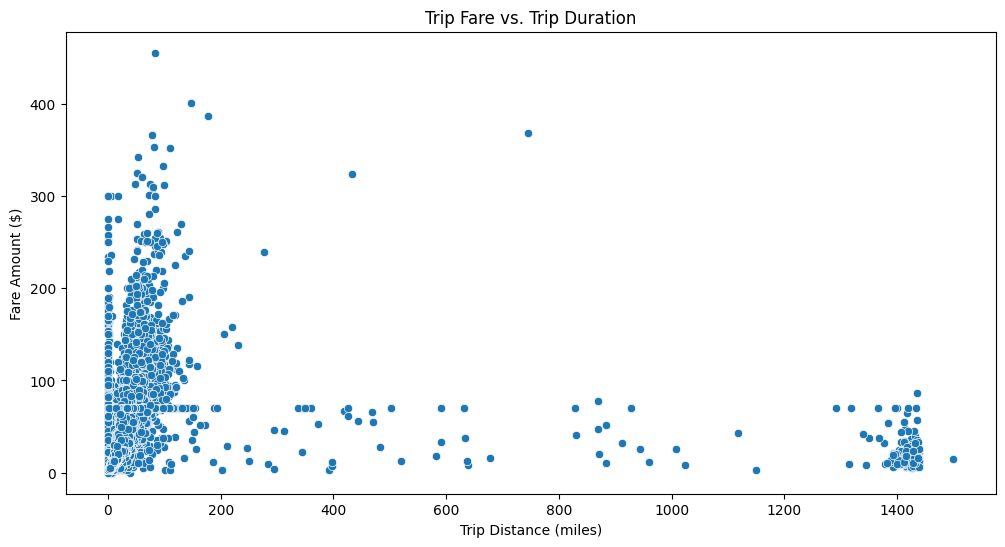

Correlation between Fare Amount and Trip Duration: 0.27


In [233]:
#what happen if we include trip ditance == 0
plt.figure(figsize=(12, 6))
sns.scatterplot(x='trip_duration', y='fare_amount', data=df)
plt.title('Trip Fare vs. Trip Duration')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.show()

#calculate correlation between fare and trip
correlation_fare_duration = df['fare_amount'].corr(df['trip_duration'])
print(f"Correlation between Fare Amount and Trip Duration: {round(correlation_fare_duration,2)}")


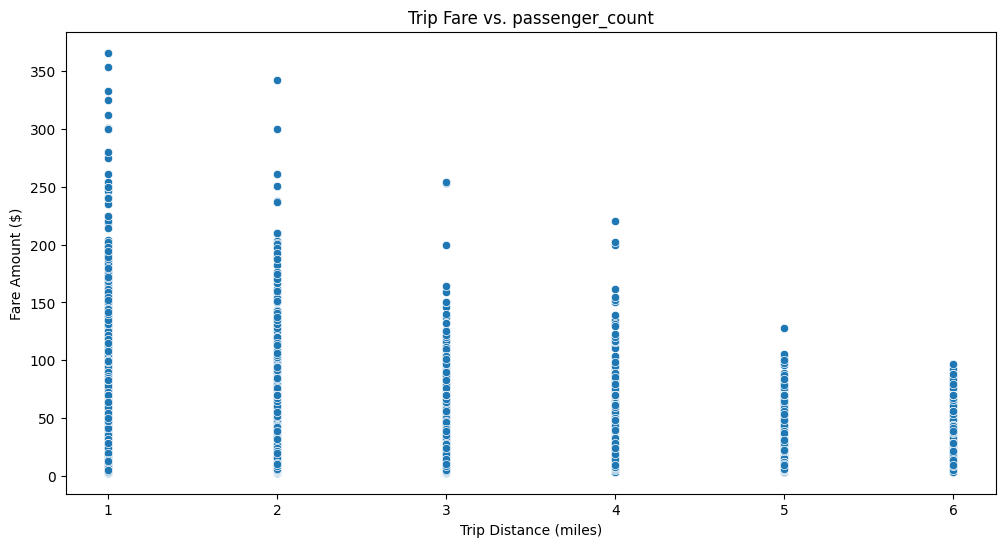

Correlation between Fare Amount and passenger_count: 0.04


In [234]:
# Show relationship between fare and number of passengers
plt.figure(figsize=(12, 6))
sns.scatterplot(x='passenger_count', y='fare_amount', data=non_zero_df)
plt.title('Trip Fare vs. passenger_count')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.show()

#calculate correlation between fare and trip
correlation_fare_distance = non_zero_df['fare_amount'].corr(non_zero_df['passenger_count'])
print(f"Correlation between Fare Amount and passenger_count: {round(correlation_fare_distance,2)}")



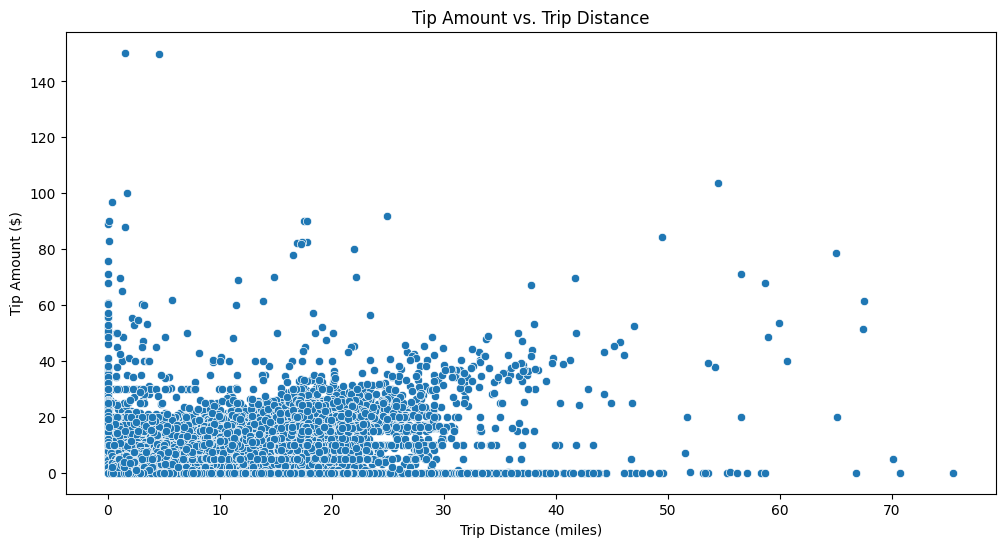

Correlation between tip and trip distance: 0.59


<Figure size 640x480 with 0 Axes>

In [235]:
# Show relationship between tip and trip distance
plt.figure(figsize=(12, 6))
sns.scatterplot(x='trip_distance', y='tip_amount', data=df)
plt.title('Tip Amount vs. Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount ($)')
plt.show()

# Calculate the correlation between tip and trip distance
correlation = df['tip_amount'].corr(df['trip_distance'])
print(f"Correlation between tip and trip distance: {round(correlation,2)}")

plt.savefig('/content/drive/MyDrive/Datasets and Dictionary/amount_vs_distance.png')

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

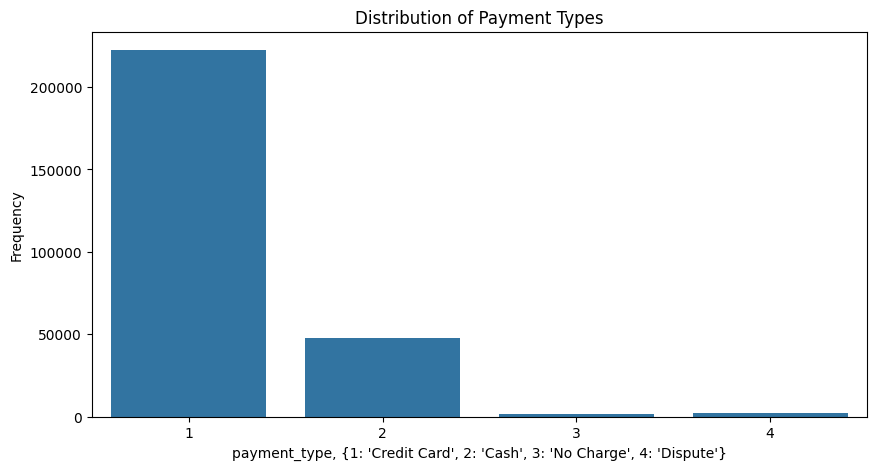

Payment Type Counts:
 payment_type
1    222379
2     47635
4      2024
3      1277
Name: count, dtype: int64

Payment Type Proportions:
 payment_type
1    0.813636
2    0.174286
4    0.007405
3    0.004672
Name: count, dtype: float64


<Figure size 640x480 with 0 Axes>

In [236]:
# Analyse the distribution of different payment types (payment_type).
payment_type_counts = df['payment_type'].value_counts()

# Create a bar plot to visualize the distribution
plt.figure(figsize=(10, 5))
sns.countplot(x='payment_type', data=df)
plt.title('Distribution of Payment Types')
plt.xlabel("payment_type, {1: 'Credit Card', 2: 'Cash', 3: 'No Charge', 4: 'Dispute'}")
plt.ylabel('Frequency')
plt.show()

# Display the payment type counts and proportions
print("Payment Type Counts:\n", payment_type_counts)
print("\nPayment Type Proportions:\n", payment_type_counts / len(df))
plt.savefig('/content/drive/MyDrive/Datasets and Dictionary/distribution_of_payment.png')


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [237]:
# !pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [238]:
import geopandas as gpd

# Read the shapefile using geopandas
zones = gpd.read_file('/content/drive/MyDrive/Datasets and Dictionary/taxi_zones/taxi_zones.shp')

# Display the GeoDataFrame
zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

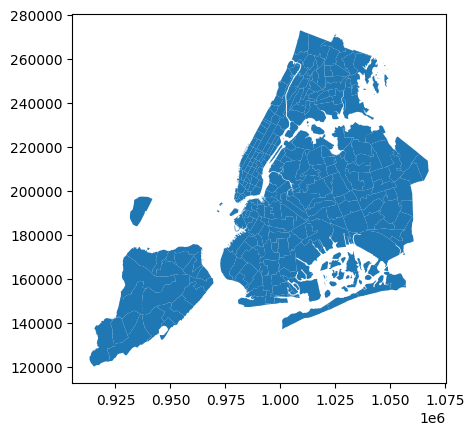

In [239]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [240]:
# Merge zones and trip records using locationID and PULocationID
df_merge = non_zero_df.merge(zones, left_on='PULocationID', right_on='LocationID', how='left')
df_merge.head()


,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,...,pickup_month,trip_duration,Airport_fee_sum,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,2,2.0,1.24,1.0,161,237,1,7.9,1.0,0.5,...,1,5.083333,0.00,161.0,0.035804,0.000072,Midtown Center,161.0,Manhattan,"POLYGON ((991081.026 214453.698, 990952.644 21..."
1,1,2.0,7.10,1.0,246,37,1,34.5,3.5,0.5,...,1,33.616667,0.00,246.0,0.069467,0.000281,West Chelsea/Hudson Yards,246.0,Manhattan,"POLYGON ((983031.177 217138.506, 983640.32 216..."
2,2,2.0,1.59,1.0,79,164,1,11.4,1.0,0.5,...,1,10.516667,0.00,79.0,0.042625,0.000108,East Village,79.0,Manhattan,"POLYGON ((988746.067 202151.955, 988733.885 20..."
3,2,1.0,3.16,1.0,79,256,1,19.1,1.0,0.5,...,1,15.883333,0.00,79.0,0.042625,0.000108,East Village,79.0,Manhattan,"POLYGON ((988746.067 202151.955, 988733.885 20..."
4,2,1.0,7.64,1.0,132,95,1,31.7,1.0,0.5,...,1,17.133333,1.25,132.0,0.245479,0.002038,JFK Airport,132.0,Queens,"MULTIPOLYGON (((1032791.001 181085.006, 103283..."


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [241]:
# Group data by location and calculate the number of trips
trips_by_location = df_merge.groupby('PULocationID')['VendorID'].count().reset_index()
trips_by_location.columns = ['LocationID', 'TripCount']

# Display the results
trips_by_location.head(10)

,LocationID,TripCount
0,1,4
1,4,207
2,6,1
3,7,33
4,9,1
5,10,50
6,12,65
7,13,1294
8,17,5
9,24,520


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [242]:
# Merge trip counts back to the zones GeoDataFrame
zones = zones.merge(trips_by_location, left_on='LocationID', right_on='LocationID', how='left')

# Fill NaN values in TripCount with 0 (for zones with no trips)
zones['TripCount'].fillna(0, inplace=True)

# Display the updated zones GeoDataFrame
zones.head()



,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,TripCount
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",4.0
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343...",0.0
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2...",0.0
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",207.0
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144...",0.0


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

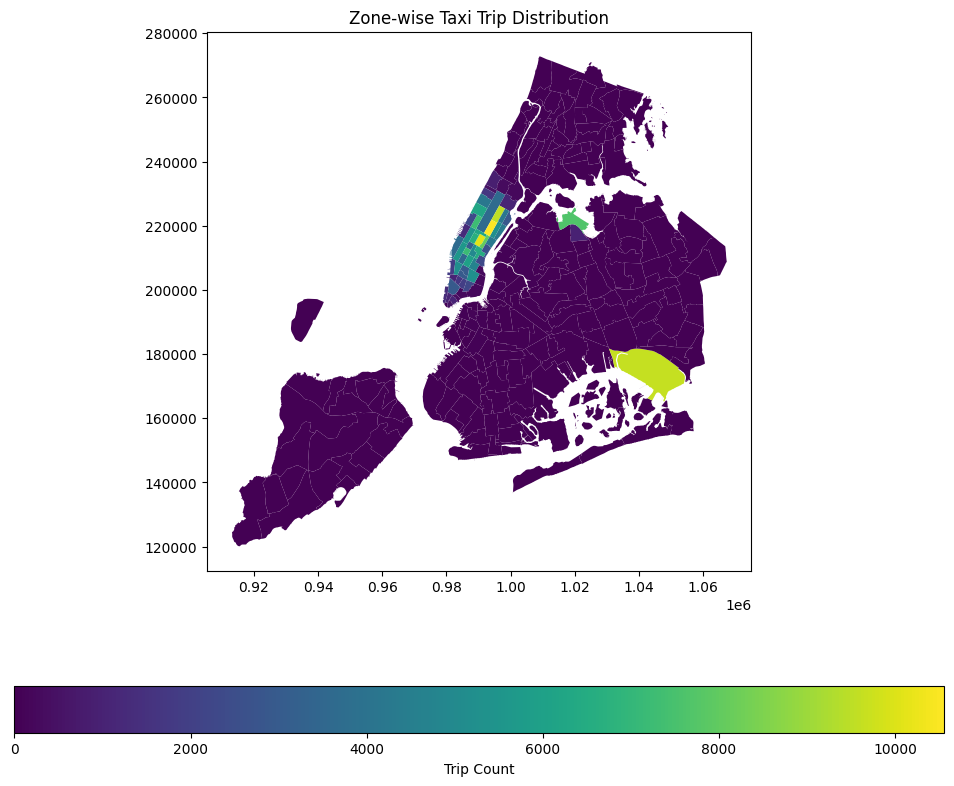

<Figure size 640x480 with 0 Axes>

In [243]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot the map
zones.plot(column='TripCount', ax=ax, legend=True, legend_kwds={'label': "Trip Count", 'orientation': "horizontal"})

# Set title
ax.set_title('Zone-wise Taxi Trip Distribution')

# Plot the map and display it
plt.show()
plt.savefig('/content/drive/MyDrive/Datasets and Dictionary/zon-wise_taxi_trip.png')

In [244]:
# can you try displaying the zones DF sorted by the number of trips?
zones_sorted = zones.sort_values('TripCount', ascending=False)

# Display the sorted zones GeoDataFrame
zones_sorted[['LocationID', 'zone', 'borough', 'TripCount']].head(10)


,LocationID,zone,borough,TripCount
236,237,Upper East Side South,Manhattan,10559.0
160,161,Midtown Center,Manhattan,10088.0
131,132,JFK Airport,Queens,9638.0
235,236,Upper East Side North,Manhattan,9543.0
161,162,Midtown East,Manhattan,8040.0
137,138,LaGuardia Airport,Queens,7642.0
141,142,Lincoln Square East,Manhattan,7244.0
185,186,Penn Station/Madison Sq West,Manhattan,7180.0
229,230,Times Sq/Theatre District,Manhattan,6674.0
169,170,Murray Hill,Manhattan,6442.0


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [245]:
# Find routes which have the slowest speeds at different times of the day
# Calculate speed in miles per hour
df_merge['speed_mph'] = df_merge['trip_distance'] / (df_merge['trip_duration'] / 60)  # Convert trip_duration to hours

# Group by pickup location, dropoff location, and pickup hour, and calculate average speed
route_speeds = df_merge.groupby(['PULocationID', 'DOLocationID', 'pickup_hour', 'borough'])['speed_mph'].mean().reset_index()

# Sort by average speed in ascending order (slowest first)
slowest_routes = route_speeds.sort_values('speed_mph')

# Display the slowest routes for different times of the day
for hour in range(24):
    print(f"\nSlowest Routes at Hour {hour}:")
    print(slowest_routes[slowest_routes['pickup_hour'] == hour].head(1))



Slowest Routes at Hour 0:
       PULocationID  DOLocationID  pickup_hour    borough  speed_mph
22171           140           264            0  Manhattan   1.865285

Slowest Routes at Hour 1:
      PULocationID  DOLocationID  pickup_hour    borough  speed_mph
1561            41           166            1  Manhattan    1.16129

Slowest Routes at Hour 2:
       PULocationID  DOLocationID  pickup_hour    borough  speed_mph
46130           238           151            2  Manhattan   1.714286

Slowest Routes at Hour 3:
       PULocationID  DOLocationID  pickup_hour    borough  speed_mph
26786           148           238            3  Manhattan    0.25343

Slowest Routes at Hour 4:
      PULocationID  DOLocationID  pickup_hour    borough  speed_mph
8874            87            87            4  Manhattan   0.765957

Slowest Routes at Hour 5:
       PULocationID  DOLocationID  pickup_hour    borough  speed_mph
39869           230           230            5  Manhattan    0.36507

Slowest Route

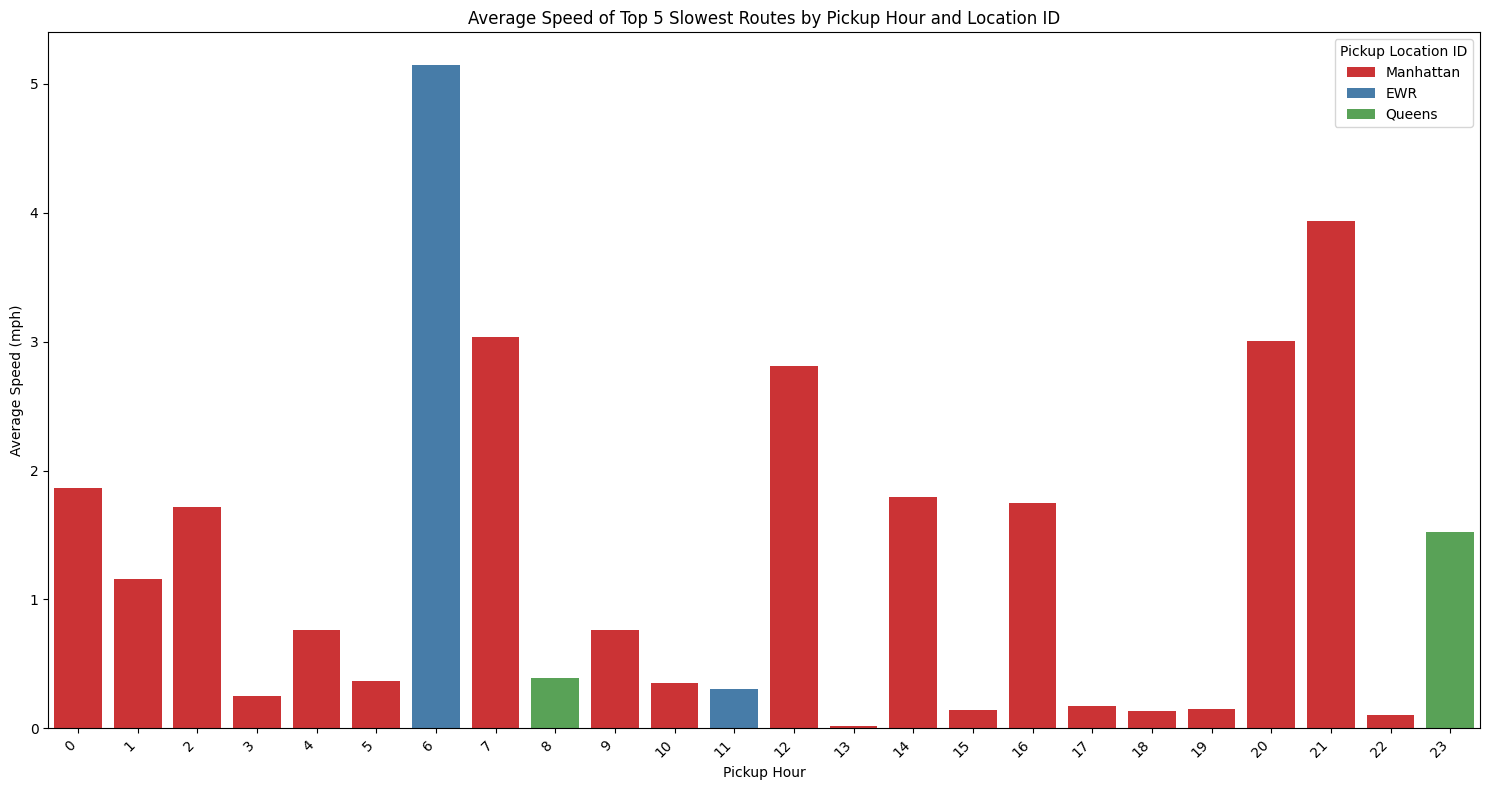

<Figure size 640x480 with 0 Axes>

In [246]:
# Filter and select data for plotting
slowest_routes_filtered = slowest_routes[slowest_routes['speed_mph'] < 10]  # Filter for speeds below 10 mph

# Get top 5 slowest routes for each hour
top_slowest = slowest_routes_filtered.groupby('pickup_hour').head(1)

# Create a bar graph
plt.figure(figsize=(15, 8))
sns.barplot(x='pickup_hour', y='speed_mph', hue='borough', data=top_slowest, palette='Set1')
plt.title('Average Speed of Top 5 Slowest Routes by Pickup Hour and Location ID')
plt.xlabel('Pickup Hour')
plt.ylabel('Average Speed (mph)')
plt.legend(title='Pickup Location ID')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
plt.savefig('/content/drive/MyDrive/Datasets and Dictionary/Average_Speed_of_Top_5_Slowest_Routes.png')

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

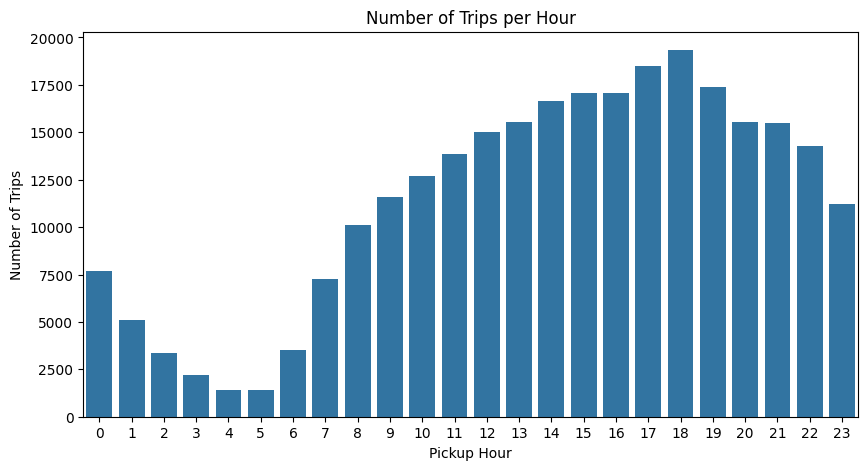

<Figure size 640x480 with 0 Axes>

In [247]:
# Visualise the number of trips per hour and find the busiest hour

# Group by pickup hour and count the number of trips
hourly_trips = df.groupby('pickup_hour')['VendorID'].count().reset_index()
hourly_trips.columns = ['Hour', 'TripCount']

# Creating a bar plot to visualize the distribution of trips per hour
plt.figure(figsize=(10, 5))
sns.barplot(x='Hour', y='TripCount', data=hourly_trips)
plt.title('Number of Trips per Hour')
plt.xlabel('Pickup Hour')
plt.ylabel('Number of Trips')
plt.show()
plt.savefig('/content/drive/MyDrive/Datasets and Dictionary/Number_of_Trips_per_hour.png')

In [248]:
hourly_trips.sort_values('TripCount', ascending=False).head(5)

,Hour,TripCount
18,18,19337
17,17,18493
19,19,17384
15,15,17070
16,16,17061


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

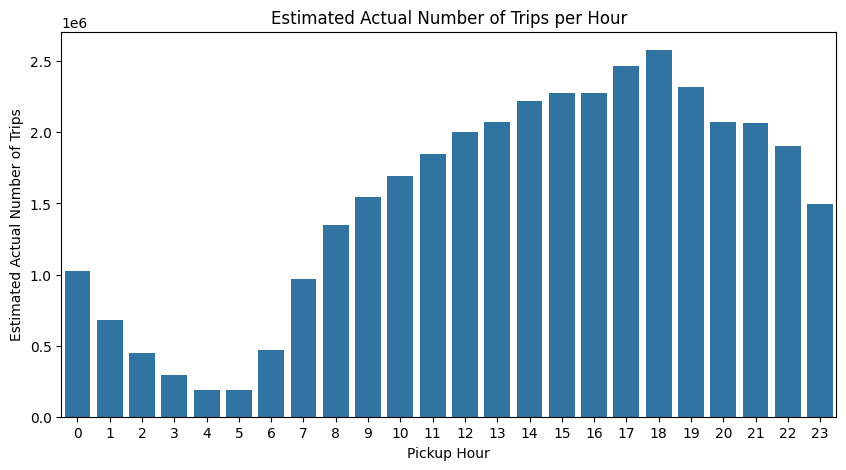

<Figure size 640x480 with 0 Axes>

In [249]:
#Scale up the trip counts by the sampling ratio
sampling_ratio = 0.0075
hourly_trips['ActualTripCount'] = hourly_trips['TripCount'] / sampling_ratio

# Create a bar plot to visualize the distribution of trips per hour (using scaled-up counts)
plt.figure(figsize=(10, 5))
sns.barplot(x='Hour', y='ActualTripCount', data=hourly_trips)
plt.title('Estimated Actual Number of Trips per Hour')  # Update title
plt.xlabel('Pickup Hour')
plt.ylabel('Estimated Actual Number of Trips')
plt.show()
plt.savefig('/content/drive/MyDrive/Datasets and Dictionary/Estimated Actual Number of Trips per Hour.png')

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [250]:
# Scale up the number of trips
busiest_hours = hourly_trips.sort_values('ActualTripCount', ascending=False).head(5)
# Fill in the value of your sampling fraction and use that to scale up the numbers
trips_by_location.head(5)


,LocationID,TripCount
0,1,4
1,4,207
2,6,1
3,7,33
4,9,1


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [251]:
non_zero_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 212209 entries, 1 to 284491
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               212209 non-null  int64  
 1   passenger_count        212209 non-null  float64
 2   trip_distance          212209 non-null  float64
 3   RatecodeID             212209 non-null  float64
 4   PULocationID           212209 non-null  int64  
 5   DOLocationID           212209 non-null  int64  
 6   payment_type           212209 non-null  int64  
 7   fare_amount            212209 non-null  float64
 8   extra                  212209 non-null  float64
 9   mta_tax                212209 non-null  float64
 10  tip_amount             212209 non-null  float64
 11  tolls_amount           212209 non-null  float64
 12  improvement_surcharge  212209 non-null  float64
 13  total_amount           212209 non-null  float64
 14  congestion_surcharge   212209 non-null  f

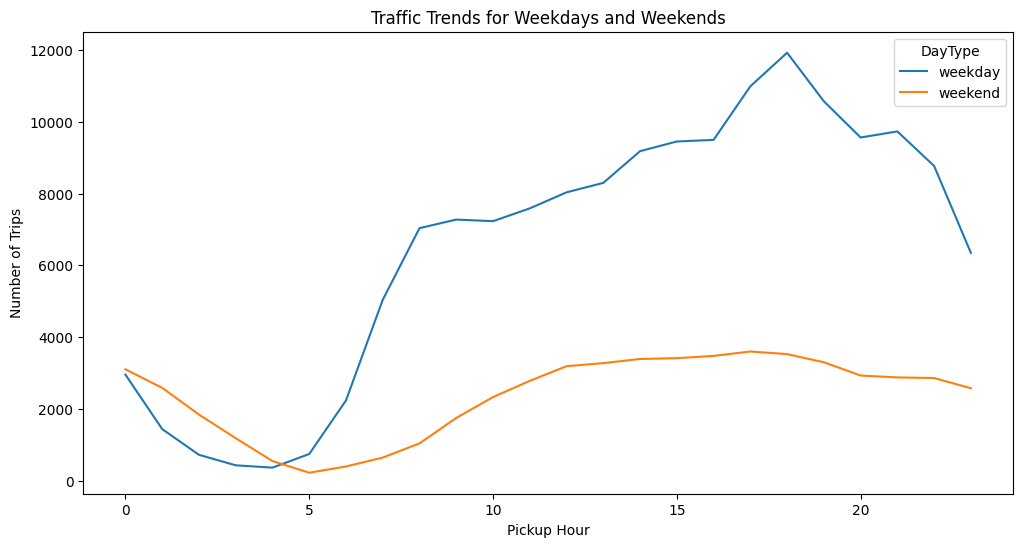

<Figure size 640x480 with 0 Axes>

In [252]:
# Compare traffic trends for the week days and weekends
# Create a new column 'day_type' to categorize weekdays and weekends
non_zero_df['day_type'] = non_zero_df['pickup_dayofweek'].map(lambda x: 'weekday' if x < 5 else 'weekend')

# Group by pickup hour and day_type and count the number of trips
hourly_trips_by_day_type = non_zero_df.groupby(['pickup_hour', 'day_type'])['VendorID'].count().reset_index()
hourly_trips_by_day_type.columns = ['Hour', 'DayType', 'TripCount']

# Create a line plot to compare traffic trends for weekdays and weekends
plt.figure(figsize=(12, 6))
sns.lineplot(x='Hour', y='TripCount', hue='DayType', data=hourly_trips_by_day_type)
plt.title('Traffic Trends for Weekdays and Weekends')
plt.xlabel('Pickup Hour')
plt.ylabel('Number of Trips')
plt.show()
plt.savefig('/content/drive/MyDrive/Datasets and Dictionary/traffic on weekdays and weekends.png')

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**Answer: It can be understood that the traffic seems high on weekdays than weekends. Meaning, we have more number of trips are made in weekdays than weekends. Also the highest weekday trips happen during the hours between 15 to 20**


**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [253]:
#find top 10 pickup and drop off xones
# Top 10 pickup zones
pickup = non_zero_df.groupby('PULocationID')['VendorID'].count()


# Top 10 dropoff zones
dropoff = non_zero_df.groupby('DOLocationID')['VendorID'].count()


In [254]:
pickup.sort_values(ascending=False).head(10)

,VendorID
PULocationID,
237,10559
161,10088
132,9638
236,9543
162,8040
138,7642
142,7244
186,7180
230,6674


In [255]:
dropoff.sort_values(ascending=False).head(10)

,VendorID
DOLocationID,
236,10190
237,9283
161,8364
170,6515
239,6411
142,6243
162,6180
141,5935
230,5793


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [256]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

# Calculate pickup and dropoff counts for each zone
pickup_counts = df['PULocationID'].value_counts()
dropoff_counts = df['DOLocationID'].value_counts()

# Create a DataFrame to store the counts and ratios
zone_counts = pd.DataFrame({'pickups': pickup_counts, 'dropoffs': dropoff_counts})
zone_counts = zone_counts.fillna(0)  # Fill NaN values with 0

# Calculate the pickup/dropoff ratio
zone_counts['pickup_dropoff_ratio'] = zone_counts['pickups'] / zone_counts['dropoffs']

# Sort by ratio and get the 10 highest and 10 lowest
top_10_highest_ratio = zone_counts.sort_values('pickup_dropoff_ratio', ascending=False).head(10)
top_10_lowest_ratio = zone_counts.sort_values('pickup_dropoff_ratio').head(10)

# Display the results
print("Top 10 Highest Pickup/Dropoff Ratios:")
print(top_10_highest_ratio)

print("\nTop 10 Lowest Pickup/Dropoff Ratios:")
print(top_10_lowest_ratio)

Top 10 Highest Pickup/Dropoff Ratios:
     pickups  dropoffs  pickup_dropoff_ratio
70    1252.0       151              8.291391
132  14514.0      3082              4.709280
138   9560.0      3310              2.888218
186   9403.0      6161              1.526213
43    4672.0      3386              1.379799
249   6121.0      4465              1.370885
114   3578.0      2645              1.352741
162   9984.0      7830              1.275096
161  12862.0     10785              1.192582
100   4484.0      3790              1.183113

Top 10 Lowest Pickup/Dropoff Ratios:
     pickups  dropoffs  pickup_dropoff_ratio
227      0.0        39                   0.0
99       0.0         1                   0.0
27       0.0         5                   0.0
201      0.0        20                   0.0
30       0.0         3                   0.0
72       0.0        52                   0.0
156      0.0         1                   0.0
59       0.0         1                   0.0
221      0.0         3  

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [257]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

# Filter data for night hours (11 PM to 5 AM)
night_hours_data = df[(df['pickup_hour'] >= 23) | (df['pickup_hour'] <= 5)]

# Top 10 pickup zones during night hours
top_10_night_pickup_zones = night_hours_data['PULocationID'].value_counts().head(10)
print("Top 10 Pickup Zones During Night Hours (11 PM to 5 AM):")
print(top_10_night_pickup_zones)

# Top 10 dropoff zones during night hours
top_10_night_dropoff_zones = night_hours_data['DOLocationID'].value_counts().head(10)
print("\nTop 10 Dropoff Zones During Night Hours (11 PM to 5 AM):")
print(top_10_night_dropoff_zones)


Top 10 Pickup Zones During Night Hours (11 PM to 5 AM):
PULocationID
79     2343
132    2188
249    1905
48     1537
148    1466
230    1291
114    1282
186    1046
138     938
164     903
Name: count, dtype: int64

Top 10 Dropoff Zones During Night Hours (11 PM to 5 AM):
DOLocationID
79     1270
48     1049
170     938
68      895
107     881
141     799
263     771
249     708
236     688
90      680
Name: count, dtype: int64


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [258]:
# Filter for night hours (11 PM to 5 AM)
# Calculate total revenue during night hours
total_night_revenue = night_hours_data['total_amount'].sum()

# Print the result
print(f"Total revenue during night hours (11 PM to 5 AM): ${total_night_revenue:.2f}")

Total revenue during night hours (11 PM to 5 AM): $959875.16


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [259]:
# Analyse the fare per mile per passenger for different passenger counts
non_zero_df['fare_per_mile'] = non_zero_df['fare_amount'] / non_zero_df['trip_distance']

# Calculate fare per mile per passenger
non_zero_df['fare_per_mile_per_passenger'] = non_zero_df['fare_per_mile'] / non_zero_df['passenger_count']

# Group by passenger count and calculate the average fare per mile per passenger
fare_analysis = non_zero_df.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().reset_index()

# Display the results
print("Average Fare per Mile per Passenger for Different Passenger Counts:")
print(fare_analysis)



Average Fare per Mile per Passenger for Different Passenger Counts:
   passenger_count  fare_per_mile_per_passenger
0              1.0                     8.969729
1              2.0                     5.563398
2              3.0                     3.702847
3              4.0                     3.461616
4              5.0                     1.512027
5              6.0                     1.277343


In [260]:
non_zero_df.fare_per_mile

,fare_per_mile
1,6.370968
5,4.859155
6,7.169811
7,6.044304
8,4.149215
...,...
284487,7.642857
284488,5.076923
284489,12.750000
284490,5.590551


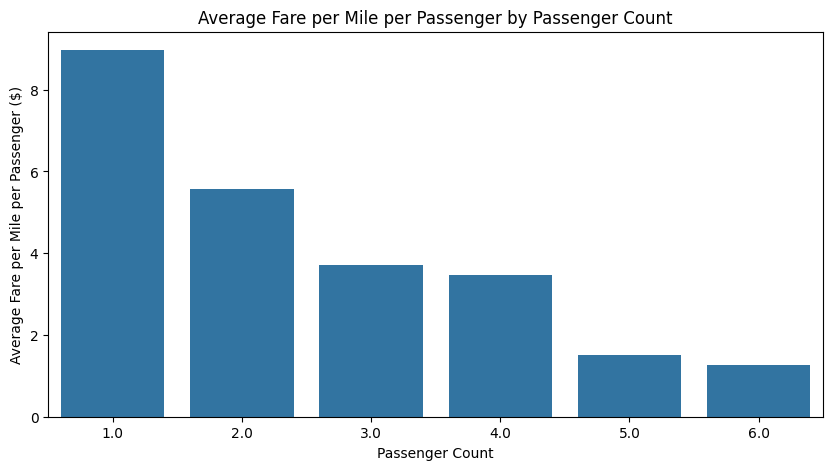

<Figure size 640x480 with 0 Axes>

In [261]:
#plot a bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x ='passenger_count', y='fare_per_mile_per_passenger', data=fare_analysis)
plt.title('Average Fare per Mile per Passenger by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Average Fare per Mile per Passenger ($)')
plt.show()
plt.savefig('/content/drive/MyDrive/Datasets and Dictionary/fare per mile vs passenger count.png')

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [262]:
non_zero_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 212209 entries, 1 to 284491
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   VendorID                     212209 non-null  int64  
 1   passenger_count              212209 non-null  float64
 2   trip_distance                212209 non-null  float64
 3   RatecodeID                   212209 non-null  float64
 4   PULocationID                 212209 non-null  int64  
 5   DOLocationID                 212209 non-null  int64  
 6   payment_type                 212209 non-null  int64  
 7   fare_amount                  212209 non-null  float64
 8   extra                        212209 non-null  float64
 9   mta_tax                      212209 non-null  float64
 10  tip_amount                   212209 non-null  float64
 11  tolls_amount                 212209 non-null  float64
 12  improvement_surcharge        212209 non-null  float64
 13  tota

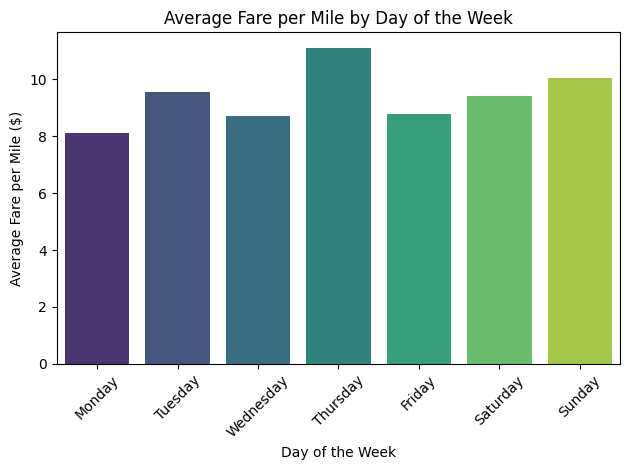

<Figure size 640x480 with 0 Axes>

In [263]:
# Compare the average fare per mile for different days and for different times of the day

# Group by day of the week and calculate the average fare per mile
fare_by_day = non_zero_df.groupby('pickup_dayofweek')['fare_per_mile'].mean().reset_index()

day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
fare_by_day['pickup_dayofweek'] = fare_by_day['pickup_dayofweek'].apply(lambda x: day_names[x])

# create bar plot for visulaisation
sns.barplot(data=fare_by_day, x='pickup_dayofweek',y='fare_per_mile', palette='viridis')
plt.title('Average Fare per Mile by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Fare per Mile ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig('/content/drive/MyDrive/Datasets and Dictionary/fare per mile by week.png')

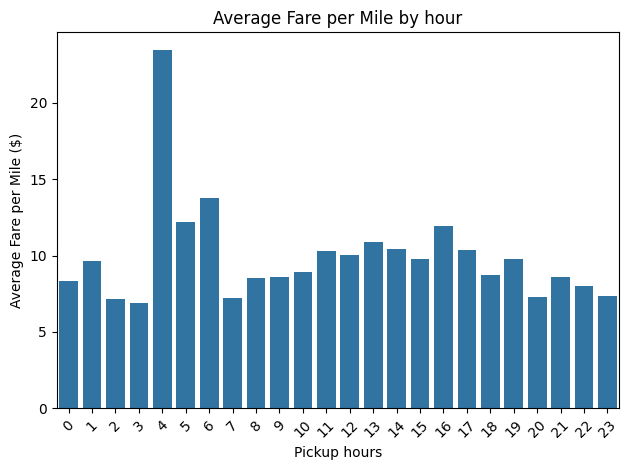

<Figure size 640x480 with 0 Axes>

In [264]:
# Group by pickup hour and calculate the average fare per mile
fare_by_hour = non_zero_df.groupby('pickup_hour')['fare_per_mile'].mean().reset_index()

# create bar plot for visulaisation
sns.barplot(data=fare_by_hour, x='pickup_hour',y='fare_per_mile')
plt.title('Average Fare per Mile by hour')
plt.xlabel('Pickup hours')
plt.ylabel('Average Fare per Mile ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig('/content/drive/MyDrive/Datasets and Dictionary/fare per mile by hour.png')

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

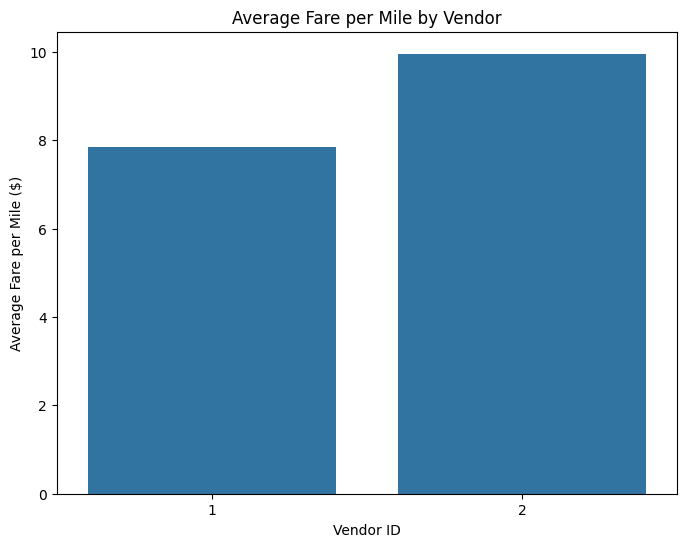

In [265]:
# Compare fare per mile for different vendors

# Group by vendor and calculate the average fare per mile
fare_by_vendor = non_zero_df.groupby('VendorID')['fare_per_mile'].mean().reset_index()

# Create a bar plot for visualization
plt.figure(figsize=(8, 6))
sns.barplot(x='VendorID', y='fare_per_mile', data=fare_by_vendor)
plt.title('Average Fare per Mile by Vendor')
plt.xlabel('Vendor ID')
plt.ylabel('Average Fare per Mile ($)')
plt.show()


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


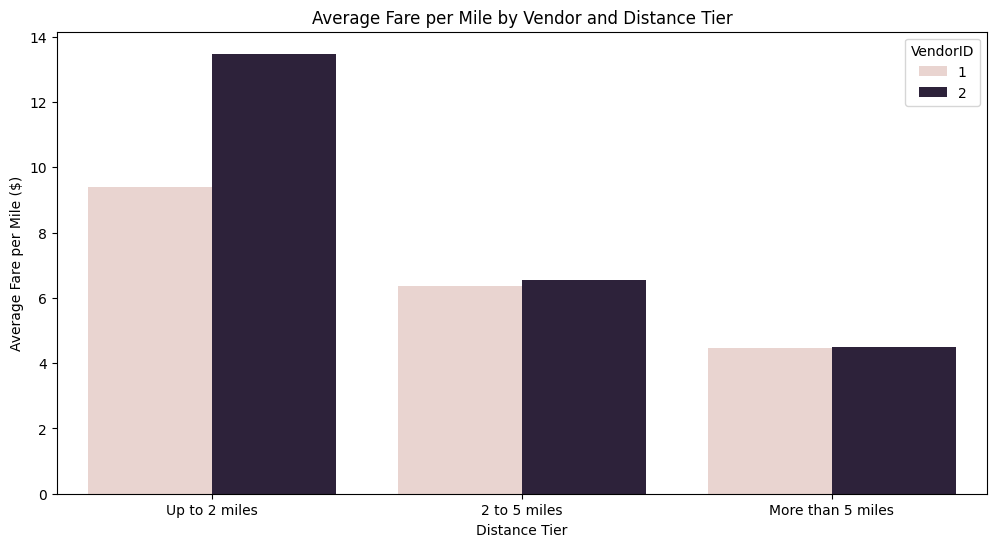

<Figure size 640x480 with 0 Axes>

In [266]:
# Defining distance tiers
# Define distance tiers
non_zero_df['distance_tier'] = pd.cut(non_zero_df['trip_distance'], bins=[0, 2, 5, 999999], labels=['Up to 2 miles', '2 to 5 miles', 'More than 5 miles'])

# Group by vendor and distance tier and calculate the average fare per mile
fare_analysis = non_zero_df.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].mean().reset_index()

# Create a bar plot for visualization
plt.figure(figsize=(12, 6))
sns.barplot(x='distance_tier', y='fare_per_mile', hue='VendorID', data=fare_analysis)
plt.title('Average Fare per Mile by Vendor and Distance Tier')
plt.xlabel('Distance Tier')
plt.ylabel('Average Fare per Mile ($)')
plt.show()
plt.savefig('/content/drive/MyDrive/Datasets and Dictionary/vendor by distance tier.png')

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

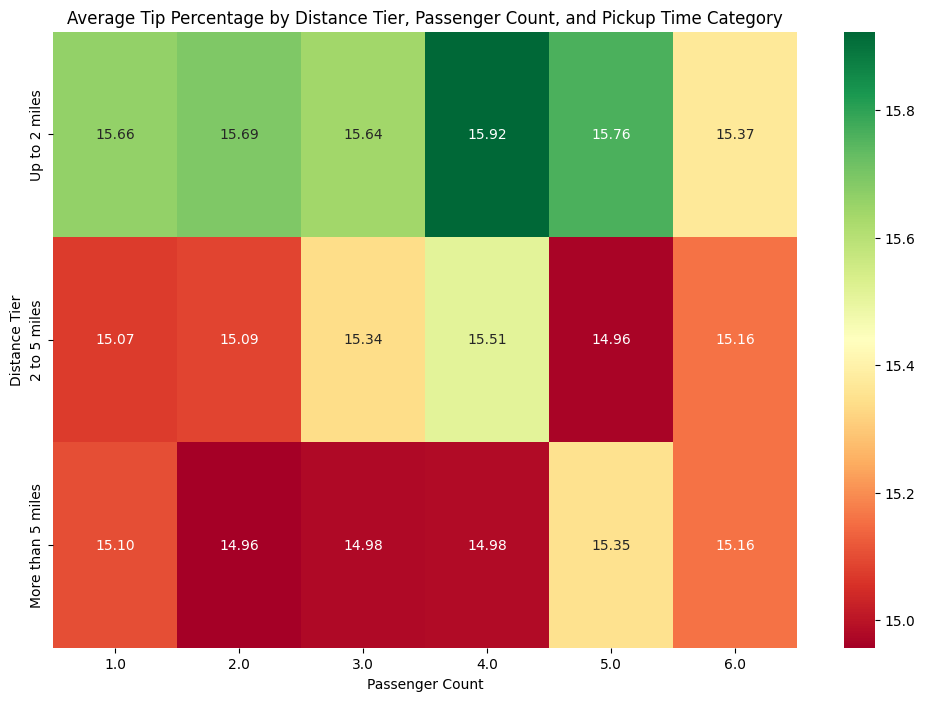

<Figure size 640x480 with 0 Axes>

In [267]:
#Data with non zero tip amount data
#  Analyze tip percentages based on distances, passenger counts and pickup times
# Calculate tip percentage
non_zero_df['tip_percentage'] = (non_zero_df['tip_amount'] / non_zero_df['total_amount']) * 100

# Define pickup time categories (you can adjust the bins and labels as needed)
non_zero_df['pickup_time_category'] = pd.cut(non_zero_df['pickup_hour'], bins=[0, 6, 12, 18, 24], labels=['Early Morning', 'Morning', 'Afternoon', 'Evening'])

# Group by distance tier, passenger count, and pickup time category and calculate average tip percentage
tip_analysis = non_zero_df.groupby(['distance_tier', 'passenger_count', 'pickup_time_category'])['tip_percentage'].mean().reset_index()

# Create a visualization
plt.figure(figsize=(12, 8))
sns.heatmap(tip_analysis.pivot_table(index='distance_tier', columns='passenger_count', values='tip_percentage', fill_value=0), annot=True, fmt ='.2f',cmap='RdYlGn')
plt.title('Average Tip Percentage by Distance Tier, Passenger Count, and Pickup Time Category')
plt.xlabel('Passenger Count')
plt.ylabel('Distance Tier')
plt.show()
plt.savefig('/content/drive/MyDrive/Datasets and Dictionary/Passenger count vs distance tier.png')

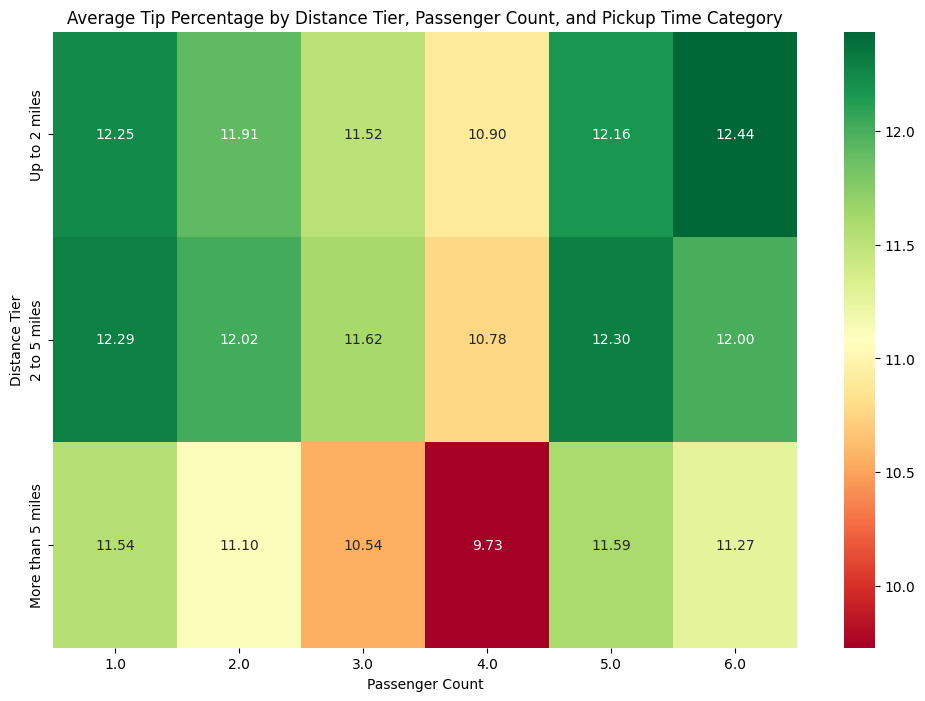

In [268]:
# data with zero tip amount data
# Calculate tip percentage
df['tip_percentage'] = (df['tip_amount'] / df['total_amount']) * 100

# Define distance tiers (you can adjust the bins and labels as needed)
df['distance_tier'] = pd.cut(df['trip_distance'], bins=[0, 2, 5, float('inf')], labels=['Up to 2 miles', '2 to 5 miles', 'More than 5 miles'])

# Define pickup time categories (you can adjust the bins and labels as needed)
df['pickup_time_category'] = pd.cut(df['pickup_hour'], bins=[0, 6, 12, 18, 24], labels=['Early Morning', 'Morning', 'Afternoon', 'Evening'])

# Group by distance tier, passenger count, and pickup time category and calculate average tip percentage
tip_analysis = df.groupby(['distance_tier', 'passenger_count', 'pickup_time_category'])['tip_percentage'].mean().reset_index()

# Create a visualization (e.g., a heatmap)
plt.figure(figsize=(12, 8))
sns.heatmap(tip_analysis.pivot_table(index='distance_tier', columns='passenger_count', values='tip_percentage', fill_value=0), annot=True, fmt ='.2f',cmap='RdYlGn')
plt.title('Average Tip Percentage by Distance Tier, Passenger Count, and Pickup Time Category')
plt.xlabel('Passenger Count')
plt.ylabel('Distance Tier')
plt.show()

In [269]:
non_zero_df.tip_percentage

,tip_percentage
1,16.666667
5,16.666667
6,16.666667
7,19.986720
8,16.666667
...,...
284487,19.897959
284488,16.638655
284489,16.528926
284490,4.950495


Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [270]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
# data with non-zero tip amount included
low_tip_trips = non_zero_df[non_zero_df['tip_percentage'] < 10]
high_tip_trips = non_zero_df[non_zero_df['tip_percentage'] > 25]

# Compare with trip distance
avg_distance_low_tip = low_tip_trips['trip_distance'].mean()
avg_distance_high_tip = high_tip_trips['trip_distance'].mean()

print(f"Average trip distance for trips with tip percentage < 10%: {avg_distance_low_tip:.2f} miles")
print(f"Average trip distance for trips with tip percentage > 25%: {avg_distance_high_tip:.2f} miles")

# Compare with average fare amount
avg_fare_low_tip = low_tip_trips['fare_amount'].mean()
avg_fare_high_tip = high_tip_trips['fare_amount'].mean()

print(f"\nAverage fare amount for trips with tip percentage < 10%: ${avg_fare_low_tip:.2f}")
print(f"Average fare amount for trips with tip percentage > 25%: ${avg_fare_high_tip:.2f}")


Average trip distance for trips with tip percentage < 10%: 3.58 miles
Average trip distance for trips with tip percentage > 25%: 2.37 miles

Average fare amount for trips with tip percentage < 10%: $20.20
Average fare amount for trips with tip percentage > 25%: $14.55


In [271]:
# Data with zero tip amount included
# Calculate tip percentage
df['tip_percentage'] = (df['tip_amount'] / df['total_amount']) * 100

# Create two DataFrames for low and high tip percentages
low_tip_trips = df[df['tip_percentage'] < 10]
high_tip_trips = df[df['tip_percentage'] > 25]

# Compare relevant features between the two groups
# Example: Compare average trip distance
avg_distance_low_tip = low_tip_trips['trip_distance'].mean()
avg_distance_high_tip = high_tip_trips['trip_distance'].mean()

print(f"Average trip distance for trips with tip percentage < 10%: {avg_distance_low_tip:.2f} miles")
print(f"Average trip distance for trips with tip percentage > 25%: {avg_distance_high_tip:.2f} miles")

# Example: Compare average fare amount
avg_fare_low_tip = low_tip_trips['fare_amount'].mean()
avg_fare_high_tip = high_tip_trips['fare_amount'].mean()

print(f"\nAverage fare amount for trips with tip percentage < 10%: ${avg_fare_low_tip:.2f}")
print(f"Average fare amount for trips with tip percentage > 25%: ${avg_fare_high_tip:.2f}")

Average trip distance for trips with tip percentage < 10%: 3.52 miles
Average trip distance for trips with tip percentage > 25%: 2.22 miles

Average fare amount for trips with tip percentage < 10%: $20.38
Average fare amount for trips with tip percentage > 25%: $14.20


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

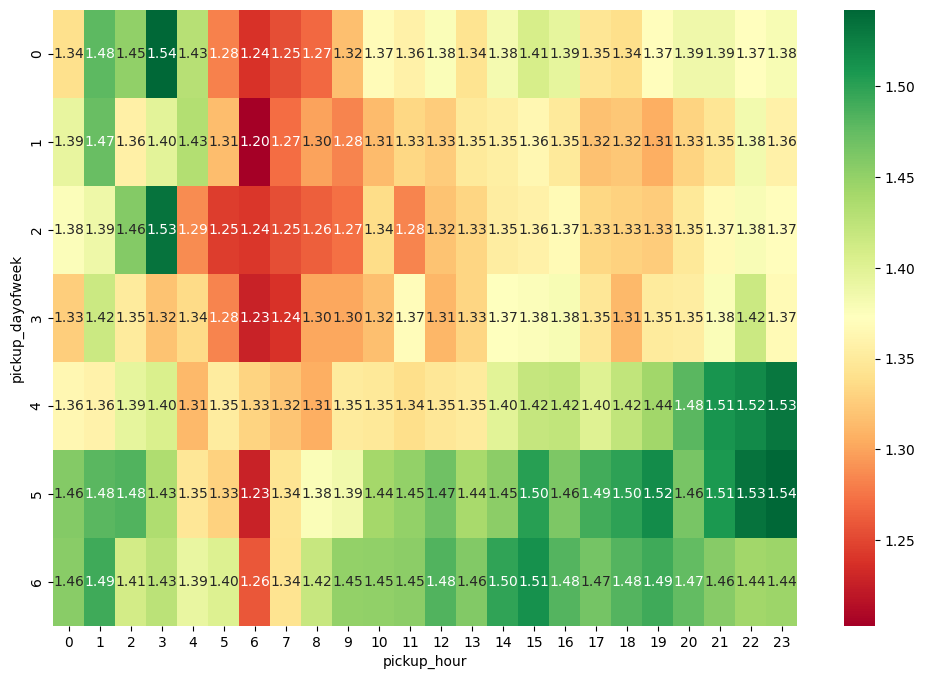

In [272]:
# See how passenger count varies across hours and days
passenger_count_analysis = df.groupby(['pickup_hour', 'pickup_dayofweek'])['passenger_count'].mean().reset_index()

# Create a heatmap for visualization
plt.figure(figsize=(12, 8))
sns.heatmap( passenger_count_analysis.pivot_table(index='pickup_dayofweek', columns='pickup_hour', values='passenger_count', fill_value=0), annot=True, fmt=".2f", cmap='RdYlGn')
plt.show()

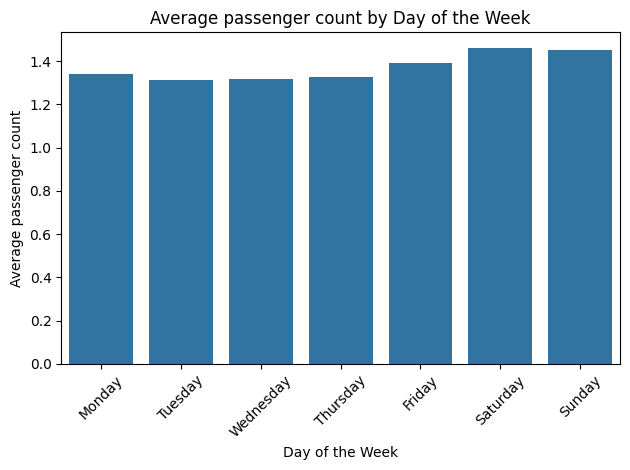

<Figure size 640x480 with 0 Axes>

In [273]:
# See how passenger count varies across hours and days
passenger_count_per_day = non_zero_df.groupby('pickup_dayofweek')['passenger_count'].mean().reset_index()

day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
passenger_count_per_day['pickup_dayofweek'] = passenger_count_per_day['pickup_dayofweek'].apply(lambda x: day_names[x])

# create bar plot for visulaisation
sns.barplot(data=passenger_count_per_day, x='pickup_dayofweek',y='passenger_count')
plt.title('Average passenger count by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average passenger count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig('/content/drive/MyDrive/Datasets and Dictionary/passenger count vs week.png')

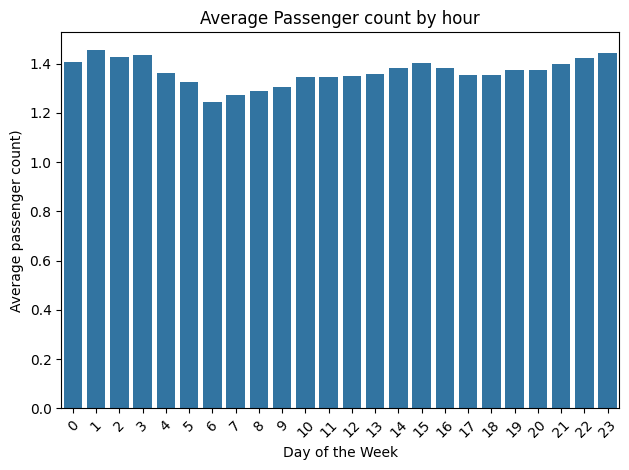

<Figure size 640x480 with 0 Axes>

In [274]:
# See how passenger count varies across hours and days
passenger_count_per_hour = non_zero_df.groupby('pickup_hour')['passenger_count'].mean().reset_index()

# create bar plot for visulaisation
sns.barplot(data=passenger_count_per_hour, x='pickup_hour',y='passenger_count')
plt.title('Average Passenger count by hour')
plt.xlabel('Day of the Week')
plt.ylabel('Average passenger count)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig('/content/drive/MyDrive/Datasets and Dictionary/passenger count vs hour.png')

In [275]:
passenger_count_per_hour.sort_values('passenger_count', ascending=False)

,pickup_hour,passenger_count
1,1,1.454455
23,23,1.444519
3,3,1.433915
2,2,1.428795
22,22,1.423044
0,0,1.406013
15,15,1.402192
21,21,1.399493
16,16,1.383430
14,14,1.380945


**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

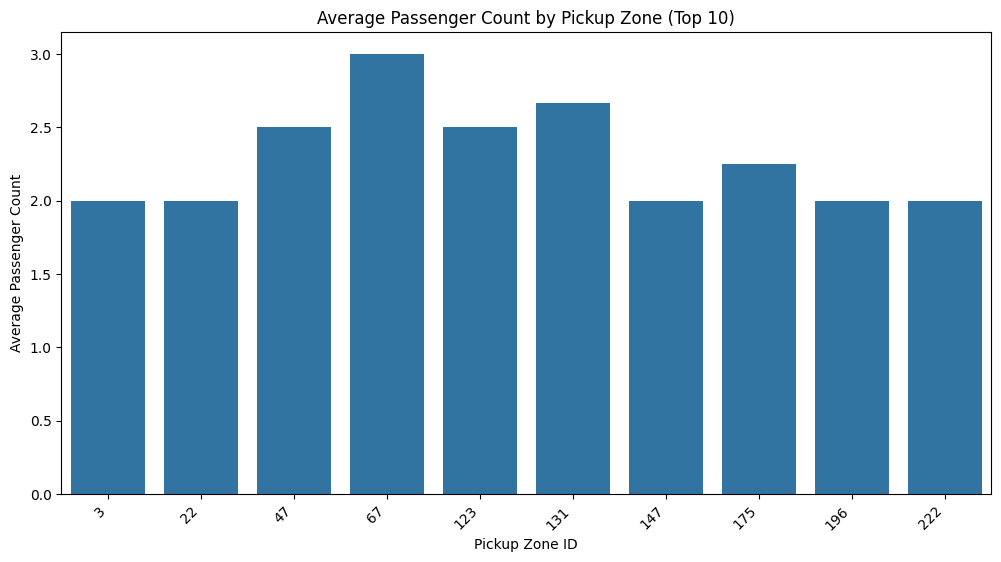

<Figure size 640x480 with 0 Axes>

In [276]:
# How does passenger count vary across zones
# Group by pickup zone and calculate average passenger count
passenger_count_by_zone = df.groupby('PULocationID')['passenger_count'].mean().reset_index()

# Sort by average passenger count in descending order
passenger_count_by_zone = passenger_count_by_zone.sort_values('passenger_count', ascending=False)

# Create a bar plot for visualization
plt.figure(figsize=(12, 6))
sns.barplot(x='PULocationID', y='passenger_count', data=passenger_count_by_zone.head(10))  # Show top 20 zones
plt.title('Average Passenger Count by Pickup Zone (Top 10)')
plt.xlabel('Pickup Zone ID')
plt.ylabel('Average Passenger Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()
plt.savefig('/content/drive/MyDrive/Datasets and Dictionary/passengercount vs zone.png')

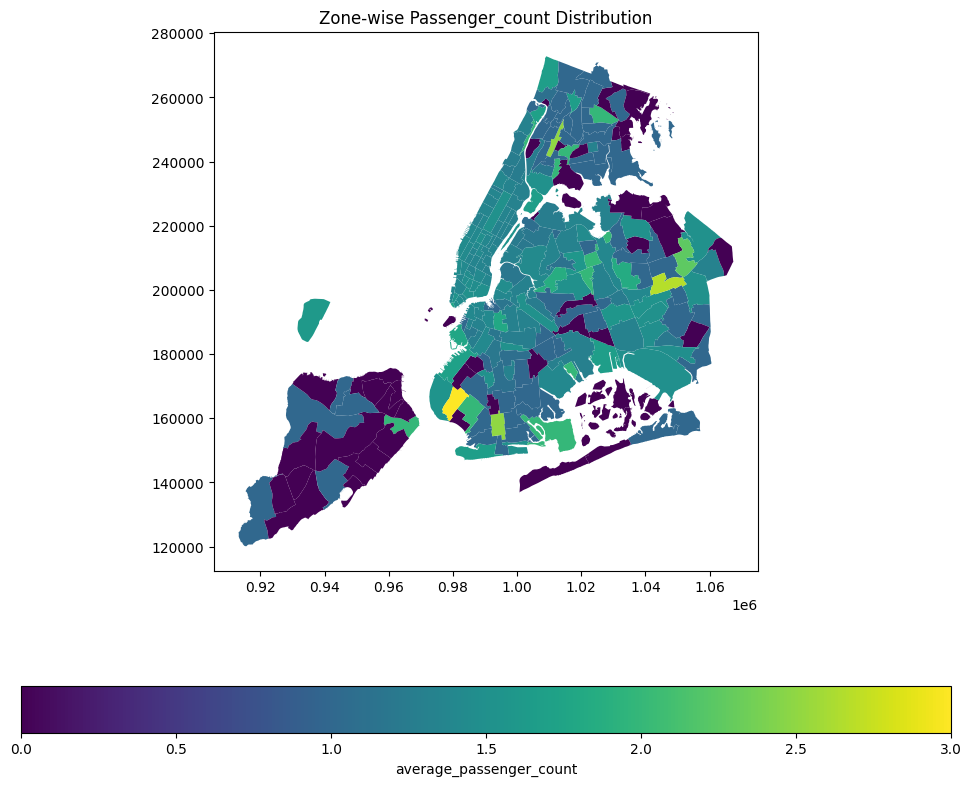

<Figure size 640x480 with 0 Axes>

In [277]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

# Calculate average passenger count for each zone
average_passenger_count = df.groupby('PULocationID')['passenger_count'].mean().reset_index()
average_passenger_count.rename(columns={'PULocationID': 'LocationID', 'passenger_count': 'avg_passenger_count'}, inplace=True)

# Merge average passenger count into zones_with_trips GeoDataFrame
zones_with_trips = zones.merge(average_passenger_count, on='LocationID', how='left')

# Fill NaN values (zones with no trips) with 0
zones_with_trips['avg_passenger_count'].fillna(0, inplace=True)

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
zones_with_trips.plot(column='avg_passenger_count', ax=ax, legend=True, legend_kwds={'label': "average_passenger_count", 'orientation': "horizontal"})
ax.set_title('Zone-wise Passenger_count Distribution')
plt.show()

plt.savefig('/content/drive/MyDrive/Datasets and Dictionary/Zone-wise passenger count.png')

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [278]:
non_zero_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 212209 entries, 1 to 284491
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   VendorID                     212209 non-null  int64   
 1   passenger_count              212209 non-null  float64 
 2   trip_distance                212209 non-null  float64 
 3   RatecodeID                   212209 non-null  float64 
 4   PULocationID                 212209 non-null  int64   
 5   DOLocationID                 212209 non-null  int64   
 6   payment_type                 212209 non-null  int64   
 7   fare_amount                  212209 non-null  float64 
 8   extra                        212209 non-null  float64 
 9   mta_tax                      212209 non-null  float64 
 10  tip_amount                   212209 non-null  float64 
 11  tolls_amount                 212209 non-null  float64 
 12  improvement_surcharge        212209 non-null  flo

In [279]:
# How often is each surcharge applied?
surcharge_columns = ['extra', 'mta_tax', 'improvement_surcharge', 'congestion_surcharge', 'Airport_fee_sum']

# Calculate the frequency of each surcharge being applied
surcharge_frequency = pd.DataFrame()
for column in surcharge_columns:
    surcharge_frequency[column] = [non_zero_df[non_zero_df[column] > 0].shape[0], (non_zero_df[non_zero_df[column] > 0].shape[0] / non_zero_df.shape[0]) * 100]

surcharge_frequency.index = ['Count', 'Percentage']

# Display the results

surcharge_frequency.T


,Count,Percentage
extra,134749.0,63.498249
mta_tax,211057.0,99.457139
improvement_surcharge,212119.0,99.957589
congestion_surcharge,201509.0,94.957801
Airport_fee_sum,17439.0,8.217842


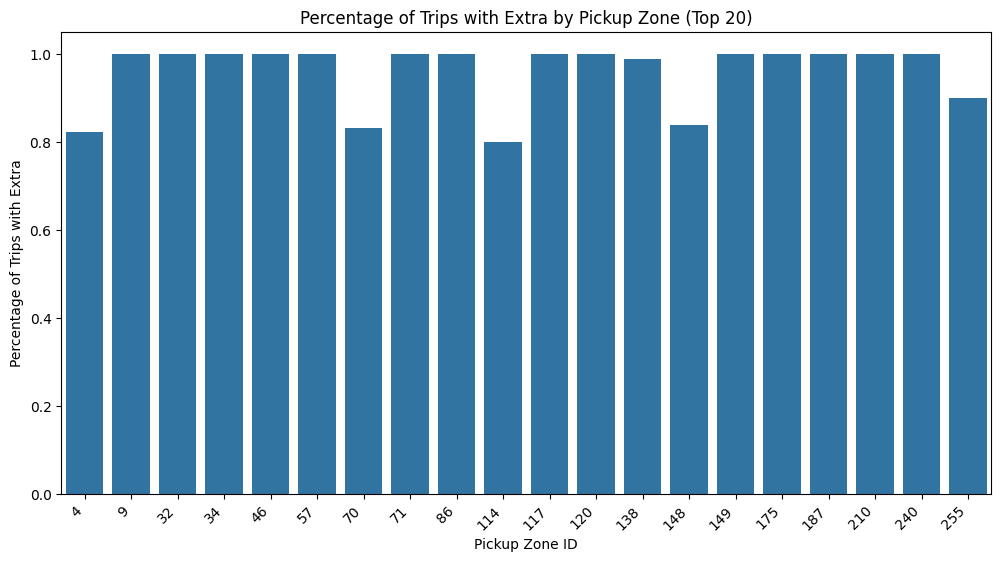

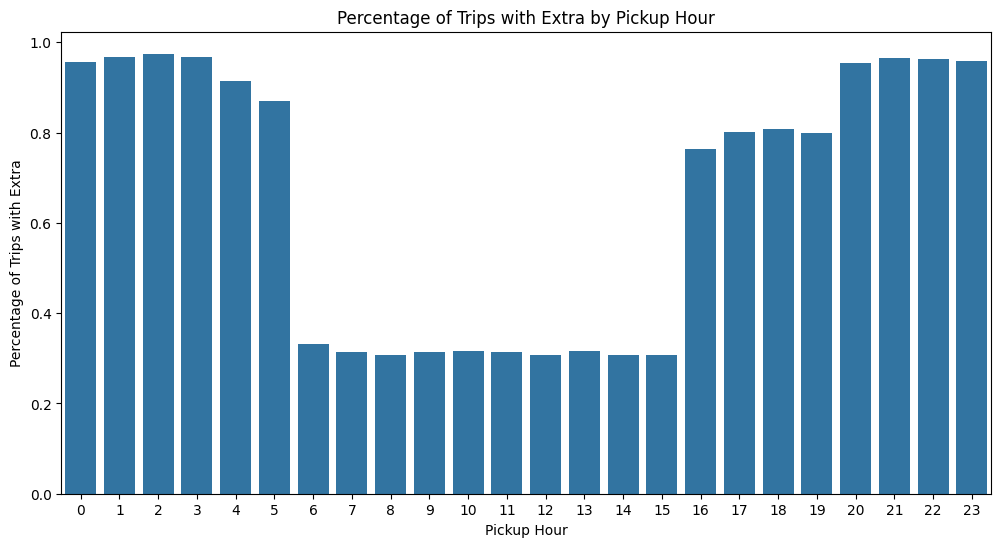

<Figure size 640x480 with 0 Axes>

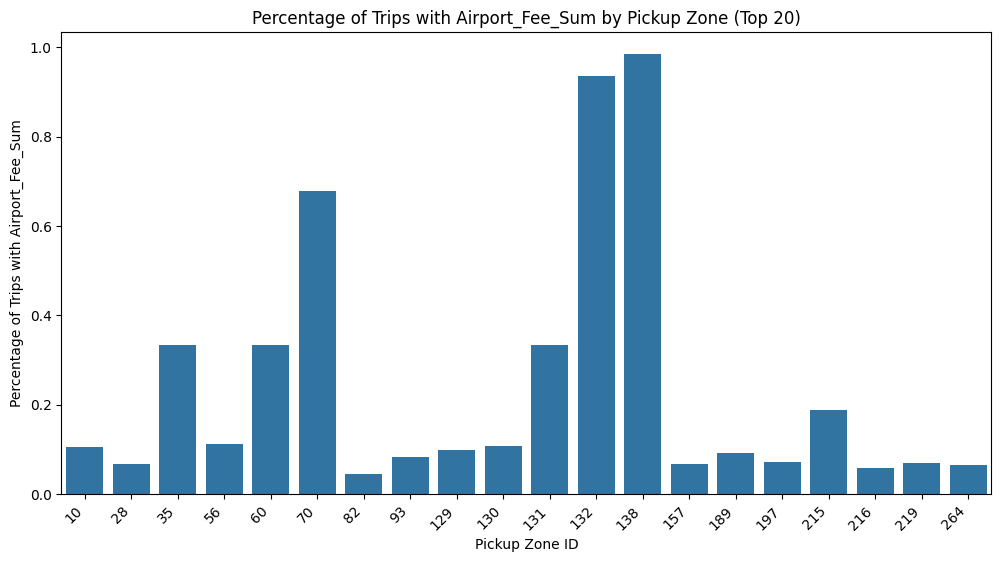

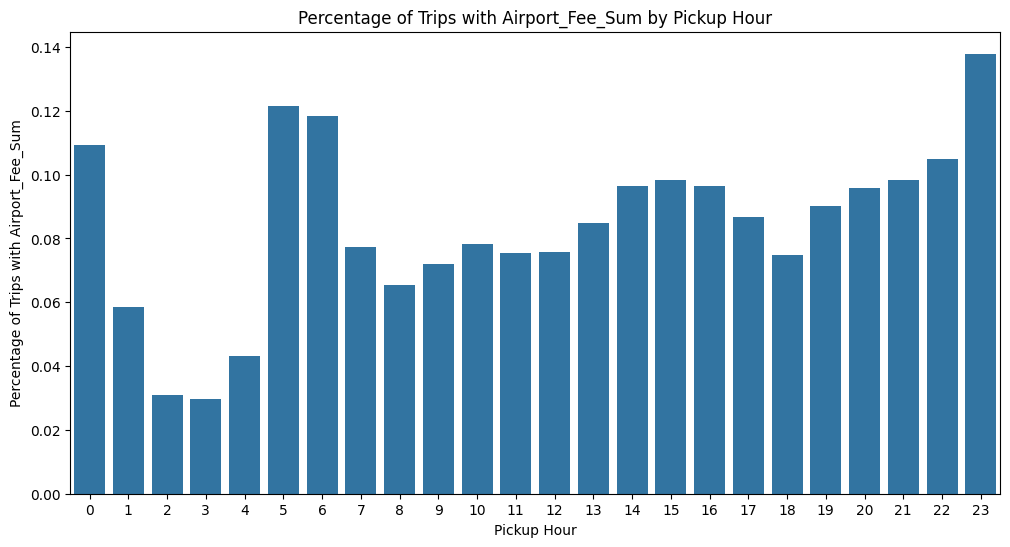

<Figure size 640x480 with 0 Axes>

In [280]:
#seeing the table it is better to analyse for Airport_fee_sum and extra than others as it is applicablefor most cases
surcharge_columns = ['extra', 'Airport_fee_sum']

for surcharge_column in surcharge_columns:
    # Create a new column indicating if the surcharge was applied
    df[surcharge_column + '_applied'] = df[surcharge_column] > 0

    # Group by pickup zone and calculate the percentage of trips with the surcharge
    surcharge_by_zone = df.groupby('PULocationID')[surcharge_column + '_applied'].mean().reset_index()
    surcharge_by_zone.rename(columns={surcharge_column + '_applied': 'percentage_' + surcharge_column}, inplace=True)

    # Sort by percentage of surcharge in descending order
    surcharge_by_zone = surcharge_by_zone.sort_values('percentage_' + surcharge_column, ascending=False)

    # Create a bar plot for visualization
    plt.figure(figsize=(12, 6))
    sns.barplot(x='PULocationID', y='percentage_' + surcharge_column, data=surcharge_by_zone.head(20))  # Show top 20 zones
    plt.title(f'Percentage of Trips with {surcharge_column.title()} by Pickup Zone (Top 20)')
    plt.xlabel('Pickup Zone ID')
    plt.ylabel(f'Percentage of Trips with {surcharge_column.title()}')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.show()

    # Group by pickup hour and calculate the percentage of trips with the surcharge
    surcharge_by_hour = df.groupby('pickup_hour')[surcharge_column + '_applied'].mean().reset_index()
    surcharge_by_hour.rename(columns={surcharge_column + '_applied': 'percentage_' + surcharge_column}, inplace=True)

    # Create a bar plot for visualization
    plt.figure(figsize=(12, 6))
    sns.barplot(x='pickup_hour', y='percentage_' + surcharge_column, data=surcharge_by_hour)
    plt.title(f'Percentage of Trips with {surcharge_column.title()} by Pickup Hour')
    plt.xlabel('Pickup Hour')
    plt.ylabel(f'Percentage of Trips with {surcharge_column.title()}')
    plt.show()
    plt.savefig('/content/drive/MyDrive/Datasets and Dictionary/surcharges.png')

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies



1.   Deploy more taxis during peak hours to meet the higher demand.
2.   Consider dynamic pricing strategies during different time periods and for different locations based on demand.
3.  Optimize routes based on traffic patterns and common pickup and drop-off locations.
4. Encourage credit card payments, as they tend to have higher tip amounts.
5. Implement loyalty programs to retain customers and increase repeat business.
6. Provide premium services or offerings during peak periods. i.e. during time 16 to 20 hr





**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.



1.   Improve communication and information flow to passengers, such as real-time updates on taxi arrival times.
2.   Ensure clean and comfortable vehicles.
3. Offer value-added services like in-car entertainment or free Wi-Fi.
4. Implement loyalty programs to retain customers who travel to  the most travelled routes






**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

1. Demand-Based Pricing: During peak hours or special events (e.g., holidays or concerts), demand for taxis increases, allowing for higher fares
2. Time-Based Pricing:Trip patterns vary significantly throughout the day, justifying fare adjustments based on time
3. Location-Based Pricing: Trips originating or ending in high-demand areas (e.g., airports, business districts) or during special events could command higher fares.